# Background Project

Sebuah perusahaan retail ingin melihat karakter customer berdasarkan metode belanja di supermarket mereka.

## Problem Statement

Perusahaan ingin melihat apakah metode belanja via web dapat ditingkatkan? Karena tren belanja retail ke depan akan bergeser ke e-commerce akibat dari kemajuan teknologi dan perubahan pola perilaku belanja customer. Kira-kira berapa banyak peningkatan customer yang dapat beralih dari belanja via store ke via web?

# Data

Data customer yang digunakan dapat diakses [disini](https://drive.google.com/drive/folders/1WodnBbuYTvsF0-6HTuQABQ0KCS31lqbK)

In [870]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
import warnings
warnings.filterwarnings("ignore")

Ada 29 kolom dalam dataset Supermarket Customer, yaitu:

Supermarket Customers Data Dictionary

People

● ID: Customer's unique identifier

● Year_Birth: Customer's birth year

● Education: Customer's education level

● Marital_Status: Customer's marital status

● Income: Customer's yearly household income

● Kidhome: Number of children in customer's household

● Teenhome: Number of teenagers in customer's household

● Dt_Customer: Date of customer's enrollment with the company

● Recency: Number of days since customer's last purchase

● Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

● MntWines: Amount spent on wine in last 2 years

● MntFruits: Amount spent on fruits in last 2 years

● MntMeatProducts: Amount spent on meat in last 2 years

● MntFishProducts: Amount spent on fish in last 2 years

● MntSweetProducts: Amount spent on sweets in last 2 years

● MntGoldProds: Amount spent on gold in last 2 years

Promotion

● NumDealsPurchases: Number of purchases made with a discount

● AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise

● AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise

● AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise

● AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise

● AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise

● Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise

Place

● NumWebPurchases: Number of purchases made through the company’s website

● NumCatalogPurchases: Number of purchases made using a catalog

● NumStorePurchases: Number of purchases made directly in stores

● NumWebVisitsMonth: Number of visits to the company’s website in the last month

Berikut 5 baris teratas dan terbawah dari dataset Supermarket Customer.

In [871]:
# menampilkan data
df = pd.read_csv('Supermarket Customers.csv', sep="\t")
display(df.head(), df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


## Data Understanding and Cleaning

### Tipe Data

In [872]:
# cek tipe data tiap kolom
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

Hal menarik yang ditemukan :

  - Income memiliki jumlah Non-null 2216 sedangkan jumlah baris ada 2240, artinya ada baris income yang null
  - Dt_Customer berisi informasi tanggal pendaftaran pelanggan di perusahaan tetapi memiliki tipe data object, mungkin dapat diubah menjadi datetime agar dapat dimanfaatkan dalam pengolahan data

### Missing Values

In [873]:
# cek missing values
missing = df.isnull().sum().rename('Jumlah').sort_values(ascending = False)

# ubah ke dataframe (dari series)
missing = pd.DataFrame(missing)

# cek presentase missing values
missing['Presentase'] = round(missing['Jumlah']  / len(df) * 100,2)
missing

,Jumlah,Presentase
Income,24,1.07
ID,0,0.00
NumDealsPurchases,0,0.00
Z_Revenue,0,0.00
Z_CostContact,0,0.00
Complain,0,0.00
AcceptedCmp2,0,0.00
AcceptedCmp1,0,0.00
AcceptedCmp5,0,0.00
AcceptedCmp4,0,0.00


- Terdapat 24 baris missing values pada kolom "income".
- Presentase missing values pada kolom "income" sebesar 1.07% yang tergolong rendah.

<Axes: >

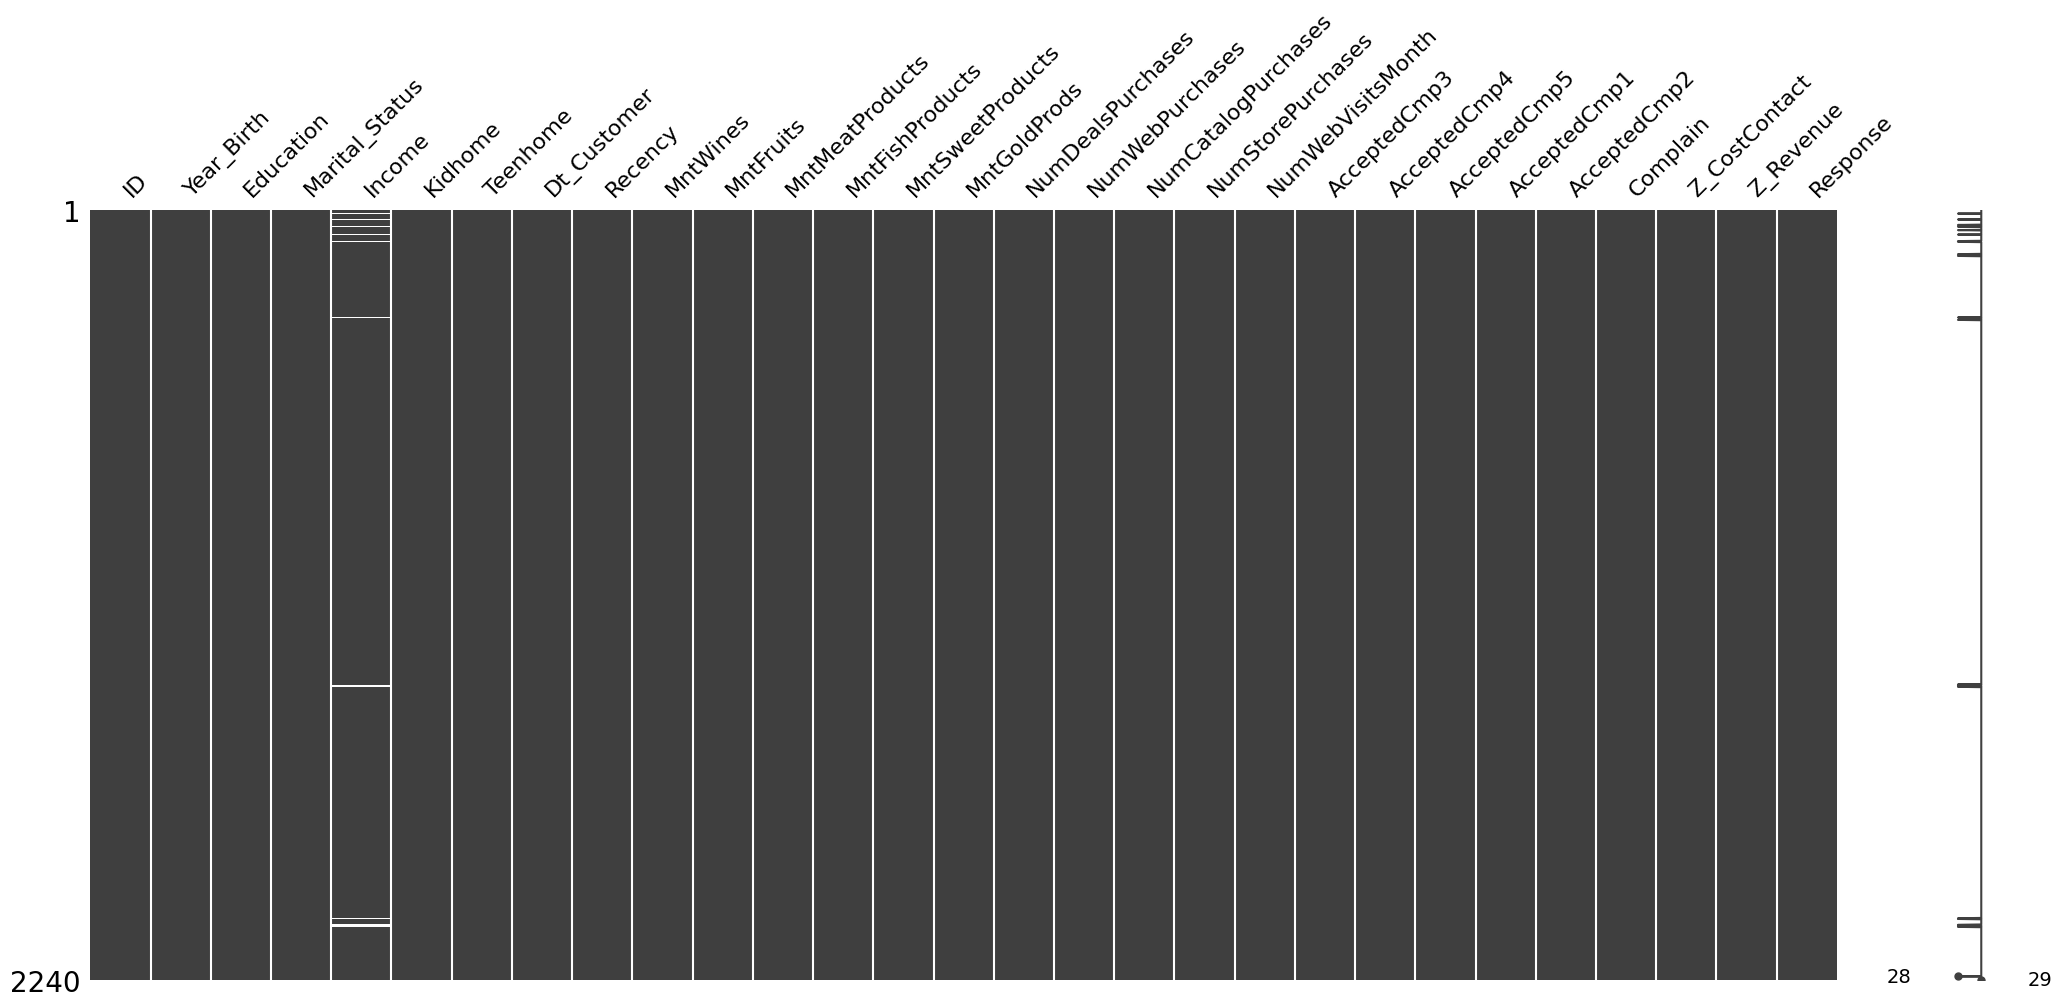

In [874]:
# melihat persebaran missing values
import missingno as msno

msno.matrix(df)

In [875]:
# menampilkan semua baris missing values
df[df.isna().any(axis=1)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


Pertimbangan missing values, setelah di cek isi data kolom lain pada baris income yang null terlihat datanya masih masuk akal, sehingga data tetap dapat digunakan. Missing values pada kolom income akan diisi data rata-rata penghasilan sesuai dengan tingkat pendidikan customer.

### Duplicate Data

In [876]:
# cek jumlah duplikat
df.duplicated().sum()

0

Karena tidak ada duplikat data, maka akan langsung masuk ke tahap pembersihan berikutnya.

### Variabel Numerik

#### Statistika Deskriptif

In [877]:
# statistika deskriptif
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Hal menarik yang ditemukan:
- Terdapat lonjakan nilai dari Q3(75%) ke max pada kolom income dari 68522 ke 666666 (angka yang tidak wajar)
- Terdapat lonjakan nilai dari Q3(75%) ke max pada kolom wines dari 504 ke 1493
- Terdapat lonjakan nilai dari Q3(75%) ke max pada kolom fruits dari 33 ke 199
- Terdapat lonjakan nilai dari Q3(75%) ke max pada kolom meat dari 232 ke 1725
- Terdapat lonjakan nilai dari Q3(75%) ke max pada kolom fish dari 50 ke 259
- Terdapat lonjakan nilai dari Q3(75%) ke max pada kolom sweet product dari 33 ke 263
- Terdapat lonjakan nilai dari Q3(75%) ke max pada kolom gold dari 56 ke 362


#### Grafik Histogram

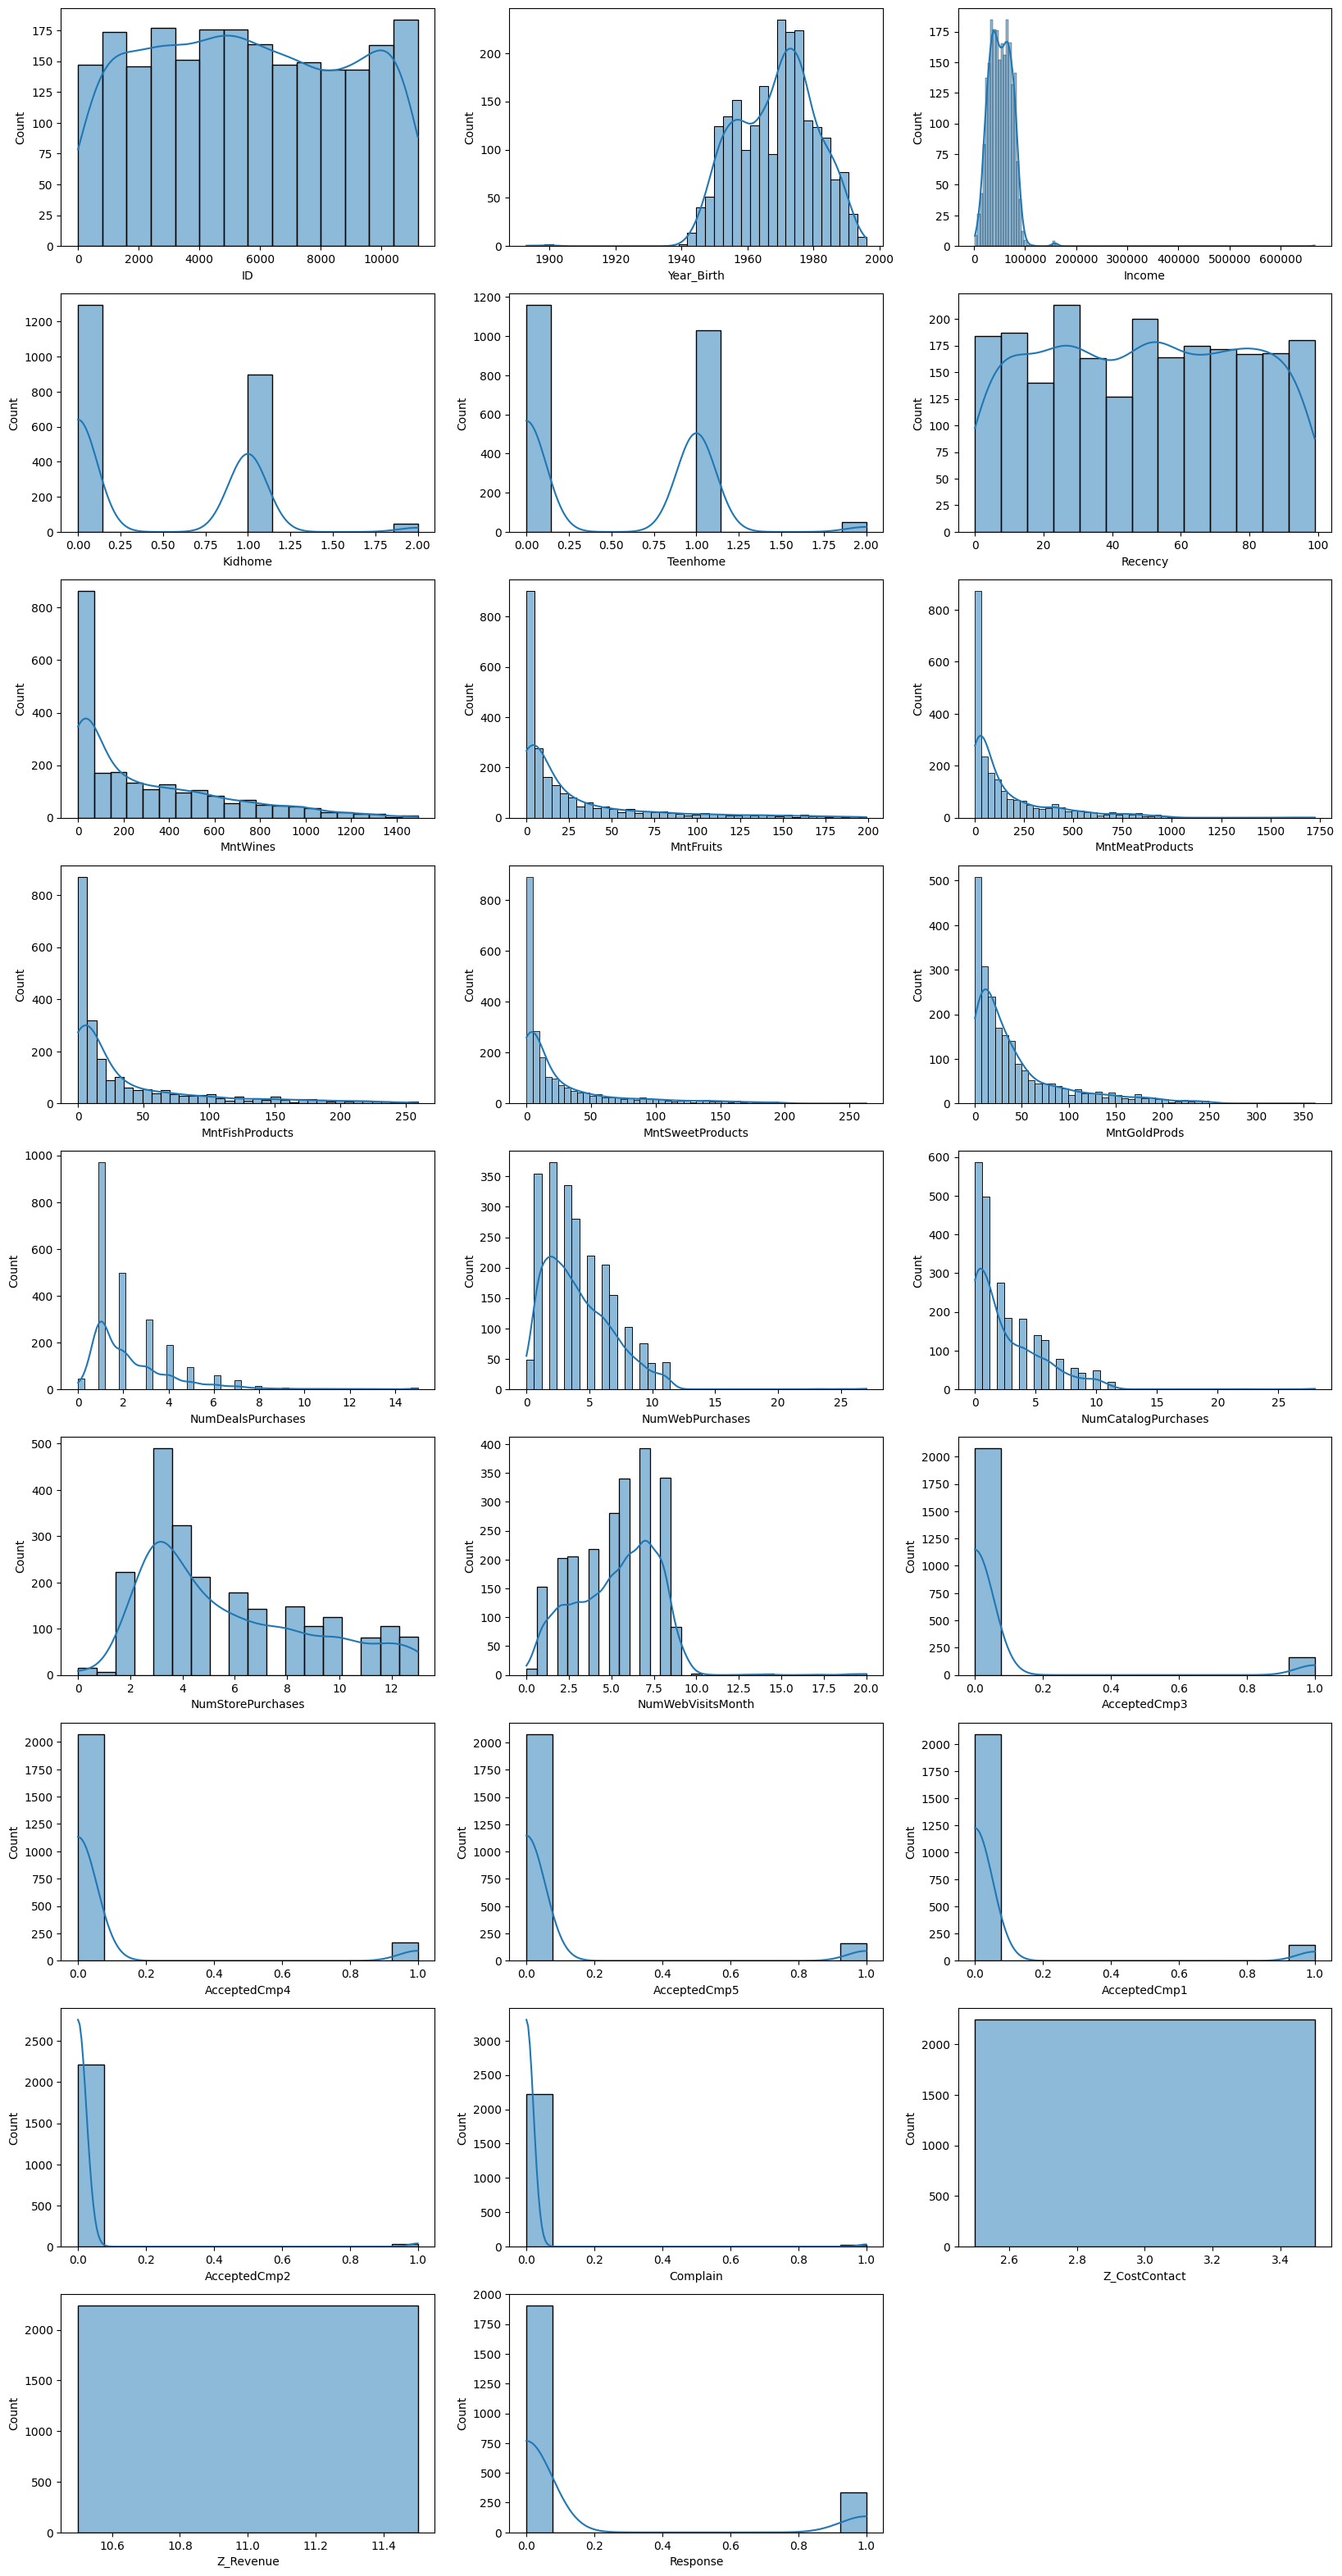

In [878]:
# ambil kolom yang numerik
numerik = df.select_dtypes(include = 'number') # float dan int

plt.figure(figsize = (20,40)) # (kolom, baris)
posisi = 1
for kolom in numerik.columns:
    plt.subplot(len(numerik.columns) // 3 + 1, 3, posisi)  # (baris, kolom, posisi) # (baris, kolom, posisi)
    sns.histplot(df[kolom], kde = True)
    posisi += 1

# print grafik
plt.show()

#### Uji Statistika

Uji statistika tidak dapat dilakukan pada data yang memiliki missing values, sehingga sementara missing values dihapus

In [879]:
# copy data
df_copy= df.copy()

# drop missing values
df_copy = df_copy.dropna()

In [880]:
# uji statistika untuk semua kolom numerik
import scipy.stats as stats
from statsmodels.stats.diagnostic import lilliefors

# Pilih kolom numerik
numerik = df.select_dtypes(include='number')

# Fungsi untuk menentukan normalitas berdasarkan p-value
def is_normal(pval, alpha=0.05):
    return "Normal" if pval >= alpha else "Tidak Normal"

# Hasil uji statistika
results = []

for kolom in numerik.columns:
    data = numerik[kolom].dropna()

    # Kolmogorov-Smirnov Test
    ks_stat, ks_pval = stats.kstest(data, 'norm', args=(data.mean(), data.std()))

    # Liliefors Test
    lf_stat, lf_pval = lilliefors(data, dist='norm')

    # Shapiro-Wilk Test
    sw_stat, sw_pval = stats.shapiro(data)

    # D'Agostino and Pearson's Test
    dp_stat, dp_pval = stats.normaltest(data)

    # Hasil uji untuk kolom
    results.append(f"\nHasil Uji Statistika dari {kolom} :\n"
                   f"Kolmogorov Smirnov: statistic={ks_stat:.4f}, pval={ks_pval:.4f}, {is_normal(ks_pval)}\n"
                   f"Liliefors Test: statistic={lf_stat:.4f}, pval={lf_pval:.4f}, {is_normal(lf_pval)}\n"
                   f"Shapiro Wilk: statistic={sw_stat:.4f}, pval={sw_pval:.4f}, {is_normal(sw_pval)}\n"
                   f"D'Agostino and Pearson's: statistic={dp_stat:.4f}, pval={dp_pval:.4f}, {is_normal(dp_pval)}")

# Cetak hasil
for result in results:
    print(result)


Hasil Uji Statistika dari ID :
Kolmogorov Smirnov: statistic=0.0609, pval=0.0000, Tidak Normal
Liliefors Test: statistic=0.0609, pval=0.0010, Tidak Normal
Shapiro Wilk: statistic=0.9541, pval=0.0000, Tidak Normal
D'Agostino and Pearson's: statistic=1671.1400, pval=0.0000, Tidak Normal

Hasil Uji Statistika dari Year_Birth :
Kolmogorov Smirnov: statistic=0.0593, pval=0.0000, Tidak Normal
Liliefors Test: statistic=0.0593, pval=0.0010, Tidak Normal
Shapiro Wilk: statistic=0.9757, pval=0.0000, Tidak Normal
D'Agostino and Pearson's: statistic=71.0624, pval=0.0000, Tidak Normal

Hasil Uji Statistika dari Income :
Kolmogorov Smirnov: statistic=0.0542, pval=0.0000, Tidak Normal
Liliefors Test: statistic=0.0542, pval=0.0010, Tidak Normal
Shapiro Wilk: statistic=0.7771, pval=0.0000, Tidak Normal
D'Agostino and Pearson's: statistic=2943.3736, pval=0.0000, Tidak Normal

Hasil Uji Statistika dari Kidhome :
Kolmogorov Smirnov: statistic=0.3726, pval=0.0000, Tidak Normal
Liliefors Test: statistic=0.

### Outliers

#### IQR

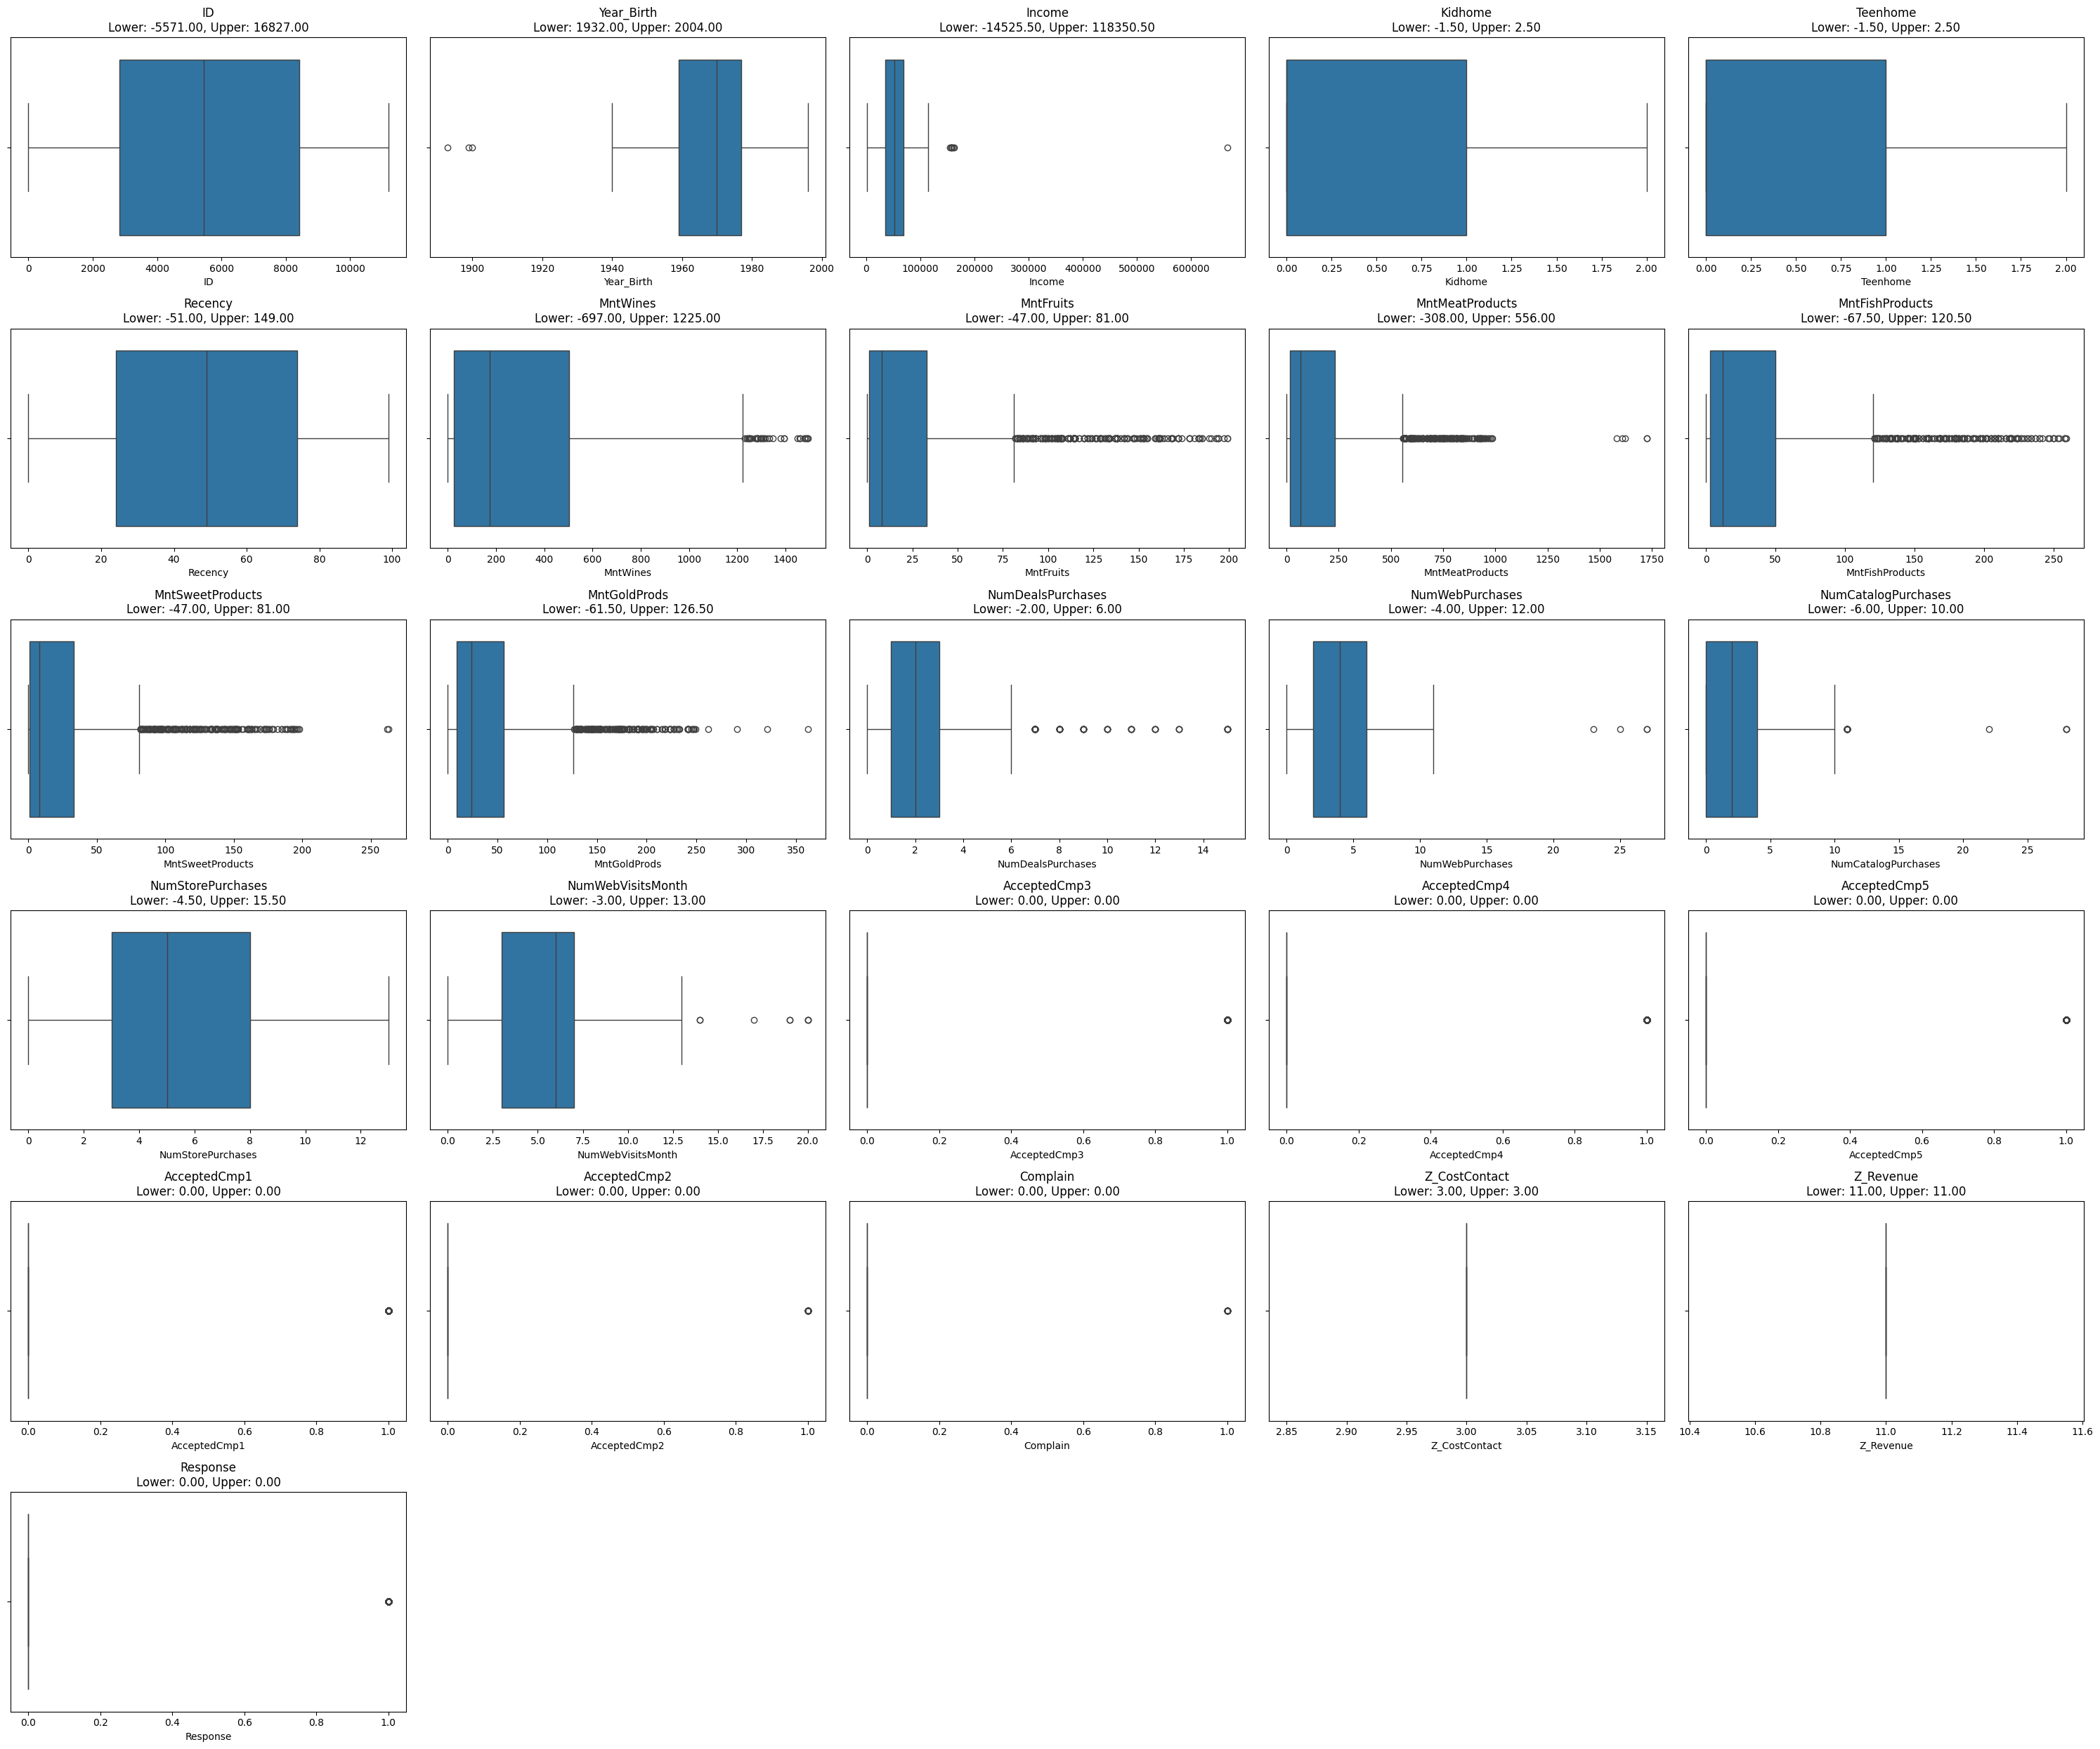

In [881]:
# Fungsi untuk menghitung batas outlier menggunakan IQR
def calculate_outliers(data):
    Q1 = data.quantile(0.25)  # Kuartil pertama
    Q3 = data.quantile(0.75)  # Kuartil ketiga
    IQR = Q3 - Q1             # Rentang antar kuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Pilih kolom numerik
numerik = df.select_dtypes(include='number')

# Plotting boxplot dan mencetak batas outliers
plt.figure(figsize=(30, 25))  # Ukuran grafik
posisi = 1
for kolom in numerik.columns:
    # Hitung batas outliers
    lower, upper = calculate_outliers(df[kolom])

    # Tambahkan subplot
    plt.subplot(6, 5, posisi)  # (baris, kolom, posisi)
    sns.boxplot(x=df[kolom])
    plt.title(f"{kolom}\nLower: {lower:.2f}, Upper: {upper:.2f}")

    posisi += 1

# Menampilkan grafik
plt.tight_layout()
plt.show()


In [882]:
# kolom numerik saja
numerik = df.select_dtypes(include = 'number')
list_jumlah_outliers = []
for kolom in numerik.columns:
    q3 = numerik.describe().loc['75%', kolom]
    q1 = numerik.describe().loc['25%', kolom]
    iqr = q3 - q1
    whis = 1.5 * iqr
    batas_atas = q3 + whis
    batas_bawah = q1 - whis

    # jumlah outliers
    jumlah_outliers = len(df[(df[kolom]>batas_atas) | (df[kolom]<batas_bawah)])
    list_jumlah_outliers.append(jumlah_outliers)

outliers = pd.DataFrame({
                          'kolom': numerik.columns,
                          'jumlah_outliers': list_jumlah_outliers
})

# mengurutkan outliers dari yang terbanyak
outliers_sorted = outliers.sort_values(by='jumlah_outliers', ascending=False)
outliers_sorted

,kolom,jumlah_outliers
25,Response,334
10,MntSweetProducts,248
7,MntFruits,227
9,MntFishProducts,223
11,MntGoldProds,207
8,MntMeatProducts,175
18,AcceptedCmp4,167
17,AcceptedCmp3,163
19,AcceptedCmp5,163
20,AcceptedCmp1,144


#### Pertimbangan Penggunaan Data *Outliers*



#### Outliers Response

In [883]:
df[df['Response'] == 1]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
15,2114,1946,PhD,Single,82800.0,0,0,24-11-2012,23,1006,...,3,0,0,1,1,0,0,3,11,1
33,7373,1952,PhD,Divorced,46610.0,0,2,29-10-2012,8,96,...,6,0,0,0,0,0,0,3,11,1
39,2968,1943,PhD,Divorced,48948.0,0,0,01-02-2013,53,437,...,6,1,0,0,0,0,0,3,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,7118,1957,Graduation,Married,73803.0,0,1,01-08-2012,61,833,...,6,1,0,0,0,0,0,3,11,1
2198,2632,1954,Graduation,Married,50501.0,1,1,18-06-2013,10,297,...,6,1,0,0,0,0,0,3,11,1
2202,11133,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,...,8,0,0,0,0,0,0,3,11,1
2221,7366,1982,Master,Single,75777.0,0,0,04-07-2013,12,712,...,1,0,1,1,0,0,0,3,11,1


Variabel response memiliki values 0 dan 1, dimana ini sebetulnya kategorik namun terlihat seperti numerik, sehingga semua outliers response tetap digunakan karena relevan dengan kebutuhan pengolohan data.

#### Outliers MntSweetProducts

In [884]:
df[df['MntSweetProducts'] >= 82]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
12,2125,1959,Graduation,Divorced,63033.0,0,0,15-11-2013,82,194,...,2,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
40,8601,1980,Graduation,Married,80011.0,0,1,29-04-2013,3,421,...,4,0,0,0,0,0,0,3,11,0
51,4114,1964,Master,Married,79143.0,0,0,11-08-2012,2,650,...,3,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175,1772,1975,PhD,Married,79174.0,0,0,11-01-2013,2,1074,...,2,0,0,1,1,0,0,3,11,1
2190,4418,1983,Master,Single,89616.0,0,0,25-02-2013,36,671,...,2,0,0,0,0,0,0,3,11,1
2193,8722,1957,2n Cycle,Married,82347.0,0,0,06-11-2012,38,556,...,3,1,0,0,1,0,0,3,11,1
2217,9589,1948,PhD,Widow,82032.0,0,0,05-04-2014,54,332,...,1,0,0,0,0,0,0,3,11,0


In [885]:
outliers_sweet = df[df['MntSweetProducts'] >= 82]
display(outliers_sweet)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
12,2125,1959,Graduation,Divorced,63033.0,0,0,15-11-2013,82,194,...,2,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
40,8601,1980,Graduation,Married,80011.0,0,1,29-04-2013,3,421,...,4,0,0,0,0,0,0,3,11,0
51,4114,1964,Master,Married,79143.0,0,0,11-08-2012,2,650,...,3,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175,1772,1975,PhD,Married,79174.0,0,0,11-01-2013,2,1074,...,2,0,0,1,1,0,0,3,11,1
2190,4418,1983,Master,Single,89616.0,0,0,25-02-2013,36,671,...,2,0,0,0,0,0,0,3,11,1
2193,8722,1957,2n Cycle,Married,82347.0,0,0,06-11-2012,38,556,...,3,1,0,0,1,0,0,3,11,1
2217,9589,1948,PhD,Widow,82032.0,0,0,05-04-2014,54,332,...,1,0,0,0,0,0,0,3,11,0


Baris yang terdapat outliers sweet setelah dilihat kolom lainnya terlihat data yang diisi dengan wajar sehingga data akan tetap digunakan untuk pengolahan data.

#### Outliers MntFruits

In [886]:
df[df['MntFruits'] >= 82]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
29,1966,1965,PhD,Married,84618.0,0,0,22-11-2013,96,684,...,2,0,0,1,0,0,0,3,11,0
45,1371,1976,Graduation,Single,79941.0,0,0,28-06-2014,72,123,...,1,0,0,0,0,0,0,3,11,0
53,2225,1977,Graduation,Divorced,82582.0,0,0,07-06-2014,54,510,...,1,1,0,0,1,0,0,3,11,1
72,6312,1959,Graduation,Married,65031.0,0,1,17-03-2013,29,258,...,7,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2172,4084,1975,Graduation,Together,60934.0,0,1,17-01-2014,41,224,...,4,0,0,0,0,0,0,3,11,0
2185,9723,1960,Graduation,Married,67716.0,0,1,10-01-2013,8,530,...,5,0,1,0,0,0,0,3,11,0
2203,2736,1978,Graduation,Married,73807.0,0,1,02-01-2013,88,366,...,2,0,0,0,0,0,0,3,11,0
2206,1092,1980,Graduation,Married,61014.0,0,1,11-08-2012,17,269,...,7,0,0,0,0,0,0,3,11,0


Baris yang terdapat outliers fruits setelah dilihat kolom lainnya terlihat data yang diisi dengan wajar sehingga data akan tetap digunakan untuk pengolahan data.

#### Outliers MntFishProducts

In [887]:
df[df['MntFishProducts'] >= 121]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
12,2125,1959,Graduation,Divorced,63033.0,0,0,15-11-2013,82,194,...,2,0,0,0,0,0,0,3,11,0
17,4939,1946,Graduation,Together,37760.0,0,0,31-08-2012,20,84,...,7,0,0,0,0,0,0,3,11,0
39,2968,1943,PhD,Divorced,48948.0,0,0,01-02-2013,53,437,...,6,1,0,0,0,0,0,3,11,1
45,1371,1976,Graduation,Single,79941.0,0,0,28-06-2014,72,123,...,1,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2188,10652,1957,Master,Together,65487.0,0,0,10-01-2014,48,240,...,2,0,0,0,0,0,0,3,11,0
2190,4418,1983,Master,Single,89616.0,0,0,25-02-2013,36,671,...,2,0,0,0,0,0,0,3,11,1
2193,8722,1957,2n Cycle,Married,82347.0,0,0,06-11-2012,38,556,...,3,1,0,0,1,0,0,3,11,1
2206,1092,1980,Graduation,Married,61014.0,0,1,11-08-2012,17,269,...,7,0,0,0,0,0,0,3,11,0


Baris yang terdapat outliers fish
 setelah dilihat kolom lainnya terlihat data yang diisi dengan wajar sehingga data akan tetap digunakan untuk pengolahan data.

#### Outliers MntGoldProds

In [888]:
df[df['MntGoldProds'] >= 127]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
18,6565,1949,Master,Married,76995.0,0,1,28-03-2013,91,1012,...,5,0,0,0,1,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
45,1371,1976,Graduation,Single,79941.0,0,0,28-06-2014,72,123,...,1,0,0,0,0,0,0,3,11,0
53,2225,1977,Graduation,Divorced,82582.0,0,0,07-06-2014,54,510,...,1,1,0,0,1,0,0,3,11,1
55,6260,1955,Master,Together,82384.0,0,0,19-11-2012,55,984,...,1,0,0,1,0,0,0,3,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178,4377,1971,Graduation,Married,52914.0,0,1,07-01-2013,32,254,...,7,1,0,0,0,0,0,3,11,0
2188,10652,1957,Master,Together,65487.0,0,0,10-01-2014,48,240,...,2,0,0,0,0,0,0,3,11,0
2194,7118,1957,Graduation,Married,73803.0,0,1,01-08-2012,61,833,...,6,1,0,0,0,0,0,3,11,1
2198,2632,1954,Graduation,Married,50501.0,1,1,18-06-2013,10,297,...,6,1,0,0,0,0,0,3,11,1


Baris yang terdapat outliers gold setelah dilihat kolom lainnya terlihat data yang diisi dengan wajar sehingga data akan tetap digunakan untuk pengolahan data.

#### Outliers MntMeatProducts

In [889]:
df[df['MntMeatProducts'] >= 558]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
21,5376,1979,Graduation,Married,2447.0,1,0,06-01-2013,42,1,...,1,0,0,0,0,0,0,3,11,0
29,1966,1965,PhD,Married,84618.0,0,0,22-11-2013,96,684,...,2,0,0,1,0,0,0,3,11,0
51,4114,1964,Master,Married,79143.0,0,0,11-08-2012,2,650,...,3,0,0,0,0,0,0,3,11,0
76,1859,1972,Master,Married,75251.0,0,0,27-08-2012,34,721,...,5,0,0,0,0,0,0,3,11,1
77,7503,1976,Graduation,Single,75825.0,0,0,12-10-2012,40,1032,...,4,1,0,0,0,0,0,3,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190,4418,1983,Master,Single,89616.0,0,0,25-02-2013,36,671,...,2,0,0,0,0,0,0,3,11,1
2193,8722,1957,2n Cycle,Married,82347.0,0,0,06-11-2012,38,556,...,3,1,0,0,1,0,0,3,11,1
2211,10469,1981,Graduation,Together,88325.0,0,0,05-02-2014,42,519,...,2,0,0,0,0,0,0,3,11,0
2213,3661,1995,2n Cycle,Single,80617.0,0,0,12-10-2012,42,594,...,2,0,0,0,0,0,0,3,11,0


Baris yang terdapat outliers meat setelah dilihat kolom lainnya terlihat data yang diisi dengan wajar sehingga data akan tetap digunakan untuk pengolahan data.

#### Outliers AcceptedCmp4

In [890]:
df[df['AcceptedCmp4'] == 1]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
22,1993,1949,PhD,Married,58607.0,0,1,23-12-2012,63,867,...,8,0,1,0,0,0,0,3,11,0
32,5710,1970,Graduation,Together,40548.0,0,1,10-10-2012,31,110,...,5,0,1,0,0,0,0,3,11,0
60,6853,1982,Master,Single,75777.0,0,0,04-07-2013,12,712,...,1,0,1,1,0,0,0,3,11,1
73,8132,1975,PhD,Married,60631.0,1,1,05-04-2013,88,565,...,7,0,1,0,0,0,0,3,11,0
86,273,1970,Master,Married,36138.0,1,1,16-07-2013,48,130,...,7,0,1,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,2666,1972,Master,Married,76234.0,0,1,06-02-2014,21,519,...,3,0,1,0,0,0,0,3,11,0
2207,4333,1954,Graduation,Together,32144.0,1,1,23-03-2014,76,41,...,7,0,1,0,0,0,0,3,11,0
2221,7366,1982,Master,Single,75777.0,0,0,04-07-2013,12,712,...,1,0,1,1,0,0,0,3,11,1
2228,8720,1978,2n Cycle,Together,NaN,0,0,12-08-2012,53,32,...,0,0,1,0,0,0,0,3,11,0


Variabel AcceptedCmp4 memiliki values 0 dan 1, dimana ini sebetulnya kategorik namun terlihat seperti numerik, sehingga semua outliers AcceptedCmp4 tetap digunakan karena relevan dengan kebutuhan pengolohan data.

#### Outliers AcceptedCmp3

In [891]:
df[df['AcceptedCmp3'] == 1]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0
39,2968,1943,PhD,Divorced,48948.0,0,0,01-02-2013,53,437,...,6,1,0,0,0,0,0,3,11,1
53,2225,1977,Graduation,Divorced,82582.0,0,0,07-06-2014,54,510,...,1,1,0,0,1,0,0,3,11,1
67,9369,1979,2n Cycle,Single,88194.0,0,1,19-03-2014,19,688,...,5,1,0,0,1,0,0,3,11,1
77,7503,1976,Graduation,Single,75825.0,0,0,12-10-2012,40,1032,...,4,1,0,0,0,0,0,3,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,7118,1957,Graduation,Married,73803.0,0,1,01-08-2012,61,833,...,6,1,0,0,0,0,0,3,11,1
2197,10722,1973,Graduation,Together,55593.0,0,1,21-08-2013,63,293,...,6,1,0,0,0,0,0,3,11,0
2198,2632,1954,Graduation,Married,50501.0,1,1,18-06-2013,10,297,...,6,1,0,0,0,0,0,3,11,1
2224,4286,1970,PhD,Single,57642.0,0,1,09-01-2014,24,580,...,4,1,0,0,0,0,0,3,11,0


Variabel AcceptedCmp3 memiliki values 0 dan 1, dimana ini sebetulnya kategorik namun terlihat seperti numerik, sehingga semua outliers AcceptedCmp3 tetap digunakan karena relevan dengan kebutuhan pengolohan data.

#### Outliers AcceptedCmp5

In [892]:
df[df['AcceptedCmp5'] == 1]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
15,2114,1946,PhD,Single,82800.0,0,0,24-11-2012,23,1006,...,3,0,0,1,1,0,0,3,11,1
29,1966,1965,PhD,Married,84618.0,0,0,22-11-2013,96,684,...,2,0,0,1,0,0,0,3,11,0
55,6260,1955,Master,Together,82384.0,0,0,19-11-2012,55,984,...,1,0,0,1,0,0,0,3,11,1
60,6853,1982,Master,Single,75777.0,0,0,04-07-2013,12,712,...,1,0,1,1,0,0,0,3,11,1
88,8504,1973,Graduation,Married,79593.0,0,0,12-05-2014,70,350,...,2,0,0,1,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168,10394,1984,Graduation,Married,90000.0,0,0,23-12-2013,91,675,...,1,1,0,1,1,0,0,3,11,0
2171,3968,1970,2n Cycle,Divorced,65706.0,0,0,28-06-2013,77,918,...,7,0,1,1,0,1,0,3,11,1
2175,1772,1975,PhD,Married,79174.0,0,0,11-01-2013,2,1074,...,2,0,0,1,1,0,0,3,11,1
2187,5721,1956,PhD,Married,84117.0,0,0,11-05-2014,60,611,...,2,0,0,1,0,0,0,3,11,0


Variabel AcceptedCmp5 memiliki values 0 dan 1, dimana ini sebetulnya kategorik namun terlihat seperti numerik, sehingga semua outliers AcceptedCmp5 tetap digunakan karena relevan dengan kebutuhan pengolohan data.

#### Outliers AcceptedCmp1

In [893]:
df[df['AcceptedCmp1'] == 1]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
15,2114,1946,PhD,Single,82800.0,0,0,24-11-2012,23,1006,...,3,0,0,1,1,0,0,3,11,1
18,6565,1949,Master,Married,76995.0,0,1,28-03-2013,91,1012,...,5,0,0,0,1,0,0,3,11,0
53,2225,1977,Graduation,Divorced,82582.0,0,0,07-06-2014,54,510,...,1,1,0,0,1,0,0,3,11,1
67,9369,1979,2n Cycle,Single,88194.0,0,1,19-03-2014,19,688,...,5,1,0,0,1,0,0,3,11,1
87,4452,1957,Graduation,Single,50388.0,0,1,28-05-2014,3,292,...,7,0,1,0,1,0,0,3,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168,10394,1984,Graduation,Married,90000.0,0,0,23-12-2013,91,675,...,1,1,0,1,1,0,0,3,11,0
2174,2829,1955,Graduation,Married,65210.0,0,1,10-03-2014,25,626,...,6,0,1,0,1,0,0,3,11,0
2175,1772,1975,PhD,Married,79174.0,0,0,11-01-2013,2,1074,...,2,0,0,1,1,0,0,3,11,1
2193,8722,1957,2n Cycle,Married,82347.0,0,0,06-11-2012,38,556,...,3,1,0,0,1,0,0,3,11,1


Variabel AcceptedCmp1 memiliki values 0 dan 1, dimana ini sebetulnya kategorik namun terlihat seperti numerik, sehingga semua outliers AcceptedCmp1 tetap digunakan karena relevan dengan kebutuhan pengolohan data.

#### Outliers NumDealsPurchases

In [894]:
df[df['NumDealsPurchases'] >= 14]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
21,5376,1979,Graduation,Married,2447.0,1,0,06-01-2013,42,1,...,1,0,0,0,0,0,0,3,11,0
164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,...,0,0,0,0,0,0,0,3,11,0
432,238,1967,2n Cycle,Together,67309.0,1,1,23-01-2013,76,515,...,7,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,...,0,0,0,0,0,0,0,3,11,0
1042,10749,1991,Graduation,Single,8028.0,0,0,18-09-2012,62,73,...,19,0,0,0,0,0,0,3,11,0
1245,6862,1971,Graduation,Divorced,1730.0,0,0,18-05-2014,65,1,...,20,0,0,0,0,0,0,3,11,0
1846,9931,1963,PhD,Married,4023.0,1,1,23-06-2014,29,5,...,19,0,0,0,0,0,0,3,11,0


Baris yang terdapat outliers NumDealsPurchases setelah dilihat kolom lainnya terlihat data yang diisi dengan wajar sehingga data akan tetap digunakan untuk pengolahan data.

#### Outliers MntWines

In [895]:
df[df['MntWines'] >= 1230]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
111,7431,1991,PhD,Single,68126.0,0,0,10-11-2012,40,1332,...,9,0,1,0,0,0,0,3,11,1
161,9260,1945,PhD,Married,70356.0,0,0,05-11-2012,20,1349,...,6,0,0,0,0,0,0,3,11,0
295,2926,1952,Master,Together,55951.0,0,1,23-08-2012,62,1241,...,8,0,1,0,0,1,0,3,11,0
424,6932,1941,PhD,Married,93027.0,0,0,13-04-2013,77,1285,...,2,0,0,1,0,0,0,3,11,0
430,3725,1961,PhD,Single,84865.0,0,0,09-05-2013,1,1248,...,4,0,1,1,1,1,0,3,11,1
466,7999,1955,PhD,Together,75261.0,0,0,23-04-2013,17,1239,...,2,0,1,1,0,0,0,3,11,1
497,11088,1971,PhD,Together,78642.0,0,1,21-04-2013,83,1396,...,6,0,0,0,0,0,0,3,11,0
515,203,1975,Master,Single,81169.0,0,0,14-04-2013,47,1288,...,2,0,0,0,0,0,0,3,11,0
523,4943,1953,Graduation,Married,70503.0,0,0,30-09-2012,73,1379,...,6,0,1,1,0,0,0,3,11,0
543,5547,1982,PhD,Married,84169.0,0,0,07-08-2013,9,1478,...,3,0,1,1,0,0,0,3,11,1


Baris yang terdapat outliers wines setelah dilihat kolom lainnya terlihat data yang diisi dengan wajar sehingga data akan tetap digunakan untuk pengolahan data.

#### Outliers AcceptedCmp2

In [896]:
df[df['AcceptedCmp2'] == 1]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
252,10089,1974,Graduation,Divorced,102692.0,0,0,05-04-2013,5,168,...,2,0,1,1,1,1,0,3,11,1
295,2926,1952,Master,Together,55951.0,0,1,23-08-2012,62,1241,...,8,0,1,0,0,1,0,3,11,0
342,9707,1969,PhD,Married,55212.0,0,1,23-11-2012,65,1103,...,8,0,1,0,0,1,0,3,11,0
417,5067,1994,Graduation,Together,80134.0,0,0,14-02-2014,11,966,...,5,0,1,1,1,1,0,3,11,0
430,3725,1961,PhD,Single,84865.0,0,0,09-05-2013,1,1248,...,4,0,1,1,1,1,0,3,11,1
559,3174,1959,Graduation,Together,87771.0,0,1,22-05-2013,61,1492,...,6,0,1,1,1,1,0,3,11,1
575,2574,1977,PhD,Married,61996.0,0,1,31-01-2013,27,1050,...,5,0,1,0,1,1,0,3,11,1
804,3483,1958,Graduation,Married,48192.0,0,0,06-04-2013,76,1039,...,8,0,1,0,1,1,0,3,11,1
822,1,1961,Graduation,Single,57091.0,0,0,15-06-2014,0,464,...,5,0,0,0,0,1,0,3,11,1
824,5536,1959,Graduation,Together,87771.0,0,1,22-05-2013,61,1492,...,6,0,1,1,1,1,0,3,11,1


Variabel AcceptedCmp2 memiliki values 0 dan 1, dimana ini sebetulnya kategorik namun terlihat seperti numerik, sehingga semua outliers AcceptedCmp2 tetap digunakan karena relevan dengan kebutuhan pengolohan data.

#### Outliers NumCatalogPurchases

In [897]:
df[df['NumCatalogPurchases'] >= 11]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
21,5376,1979,Graduation,Married,2447.0,1,0,06-01-2013,42,1,...,1,0,0,0,0,0,0,3,11,0
104,8908,1959,Graduation,Married,87195.0,0,0,08-05-2014,35,217,...,1,0,0,0,0,0,0,3,11,1
164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,...,0,0,0,0,0,0,0,3,11,0
288,10102,1966,Graduation,Widow,79946.0,0,0,12-05-2014,19,395,...,3,0,0,0,0,0,0,3,11,0
586,9058,1955,Graduation,Widow,79800.0,0,0,23-09-2012,65,1060,...,3,1,0,1,1,0,0,3,11,1
591,7627,1975,Master,Married,92163.0,0,0,12-12-2012,25,817,...,2,0,0,1,1,0,0,3,11,1
627,4299,1960,Graduation,Together,70971.0,0,1,21-09-2012,28,1001,...,7,0,0,0,0,0,0,3,11,1
636,6945,1952,Graduation,Single,84574.0,0,0,04-06-2013,72,387,...,5,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,...,0,0,0,0,0,0,0,3,11,0
764,4508,1952,Graduation,Single,75127.0,0,0,22-05-2014,92,203,...,1,0,0,0,0,0,0,3,11,0


Baris yang terdapat outliers NumCatalogPurchases setelah dilihat kolom lainnya terlihat data yang diisi dengan wajar sehingga data akan tetap digunakan untuk pengolahan data.

#### Outliers Complain

In [898]:
df[df['Complain'] == 1]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
78,10401,1976,2n Cycle,Together,26326.0,0,0,04-09-2013,12,1,...,3,0,0,0,0,0,1,3,11,0
147,3120,1981,Graduation,Together,38547.0,1,0,28-08-2013,49,6,...,8,0,0,0,0,0,1,3,11,0
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,...,5,0,0,0,0,0,1,3,11,0
271,5726,1983,Master,Single,31788.0,1,0,20-03-2014,15,16,...,5,0,0,0,0,0,1,3,11,0
355,6201,1978,Graduation,Single,38643.0,1,1,29-11-2013,45,22,...,7,0,0,0,0,0,1,3,11,0
358,6142,1943,Master,Married,65073.0,0,0,20-08-2013,65,629,...,2,0,0,0,0,0,1,3,11,0
590,3710,1984,PhD,Single,39684.0,1,0,12-10-2012,41,19,...,7,0,0,0,0,0,1,3,11,1
972,10995,1988,2n Cycle,Married,15716.0,1,0,12-11-2012,8,16,...,8,0,0,0,0,0,1,3,11,0
1041,6730,1954,Graduation,Married,38998.0,1,1,03-11-2012,92,34,...,8,0,0,0,0,0,1,3,11,0
1069,2875,1978,Graduation,Married,67023.0,0,0,04-03-2014,93,444,...,2,0,0,0,0,0,1,3,11,0


Variabel complain memiliki values 0 dan 1, dimana ini sebetulnya kategorik namun terlihat seperti numerik, sehingga semua outliers complain tetap digunakan karena relevan dengan kebutuhan pengolohan data.

#### Outliers Income

In [899]:
df[df['Income'] >= 150000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,...,0,0,0,0,0,0,0,3,11,0
617,1503,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,...,1,0,0,0,0,0,0,3,11,0
655,5555,1975,Graduation,Divorced,153924.0,0,0,07-02-2014,81,1,...,0,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,...,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,...,1,0,0,0,0,0,0,3,11,0
1653,4931,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,...,1,0,0,0,0,0,0,3,11,0
2132,11181,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,...,0,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,...,6,0,0,0,0,0,0,3,11,0


Terdapat outliers income dengan value 666666 dimana ini dirasa merupakan kesalahan input sehingga untuk baris data ini akan dihapus. Baris lainnya yang terdapat outliers income setelah dilihat kolom lainnya terlihat data yang diisi dengan wajar sehingga data akan tetap digunakan untuk pengolahan data.

#### Outliers NumWebVisitsMonth

In [900]:
df[df['NumWebVisitsMonth'] >= 13.5]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0
774,4303,1957,PhD,Together,6835.0,0,1,08-12-2012,76,107,...,20,0,0,0,0,0,0,3,11,0
981,3955,1965,Graduation,Divorced,4861.0,0,0,22-06-2014,20,2,...,14,0,0,0,0,0,0,3,11,0
1042,10749,1991,Graduation,Single,8028.0,0,0,18-09-2012,62,73,...,19,0,0,0,0,0,0,3,11,0
1245,6862,1971,Graduation,Divorced,1730.0,0,0,18-05-2014,65,1,...,20,0,0,0,0,0,0,3,11,0
1328,4246,1982,Master,Single,6560.0,0,0,12-12-2013,2,67,...,17,0,0,0,0,0,0,3,11,0
1524,11110,1973,Graduation,Single,3502.0,1,0,13-04-2013,56,2,...,14,0,0,0,0,0,0,3,11,0
1846,9931,1963,PhD,Married,4023.0,1,1,23-06-2014,29,5,...,19,0,0,0,0,0,0,3,11,0


Baris yang terdapat outliers NumWebVisitsMonth setelah dilihat kolom lainnya terlihat data yang diisi dengan wajar sehingga data akan tetap digunakan untuk pengolahan data.

#### Outliers NumWebPurchases

In [901]:
df[df['NumWebPurchases'] >= 23]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
1806,6237,1966,PhD,Single,7144.0,0,2,07-12-2013,92,81,...,0,0,0,0,0,0,0,3,11,0
1898,4619,1945,PhD,Single,113734.0,0,0,28-05-2014,9,6,...,1,0,0,0,0,0,0,3,11,0
1975,10311,1969,Graduation,Married,4428.0,0,1,05-10-2013,0,16,...,1,0,0,0,0,0,0,3,11,0


Baris yang terdapat outliers NumWebPurchases setelah dilihat kolom lainnya terlihat data yang diisi dengan wajar sehingga data akan tetap digunakan untuk pengolahan data.

#### Outliers Year_Birth

In [902]:
df[df['Year_Birth'] <= 1900]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,...,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,...,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,...,1,0,0,1,0,0,0,3,11,0


In [903]:
# Menampilkan baris dengan 10 nilai Year_Birth tertinggi
top_10_rows = df.nlargest(10, 'Year_Birth')

display(top_10_rows)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
46,9909,1996,2n Cycle,Married,7500.0,0,0,09-11-2012,24,3,...,9,0,0,0,0,0,0,3,11,1
1170,193,1996,Basic,Married,14421.0,0,0,17-02-2014,81,0,...,5,1,0,0,0,0,0,3,11,0
696,8315,1995,Graduation,Single,34824.0,0,0,26-03-2014,65,4,...,6,0,0,0,0,0,0,3,11,0
747,10548,1995,Graduation,Single,71163.0,0,0,09-03-2014,30,283,...,1,0,0,0,0,0,0,3,11,0
995,5184,1995,Graduation,Single,34824.0,0,0,26-03-2014,65,4,...,6,0,0,0,0,0,0,3,11,0
1850,4427,1995,2n Cycle,Single,83257.0,0,0,18-09-2012,56,536,...,6,1,0,1,0,0,1,3,11,1
2213,3661,1995,2n Cycle,Single,80617.0,0,0,12-10-2012,42,594,...,2,0,0,0,0,0,0,3,11,0
417,5067,1994,Graduation,Together,80134.0,0,0,14-02-2014,11,966,...,5,0,1,1,1,1,0,3,11,0
914,10619,1994,Graduation,Single,95529.0,0,0,03-12-2012,29,770,...,3,0,0,1,0,0,0,3,11,1
1163,6905,1994,Graduation,Together,80685.0,0,0,22-08-2012,55,241,...,2,0,0,0,0,0,0,3,11,0


In [904]:
# Menampilkan baris dengan 10 nilai Year_Birth terendah
top_10_rows = df.nsmallest(10, 'Year_Birth')

display(top_10_rows)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,...,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,...,1,0,0,1,0,0,0,3,11,0
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,...,5,0,0,0,0,0,1,3,11,0
1950,6663,1940,PhD,Single,51141.0,0,0,08-07-2013,96,144,...,5,0,0,0,0,0,0,3,11,0
424,6932,1941,PhD,Married,93027.0,0,0,13-04-2013,77,1285,...,2,0,0,1,0,0,0,3,11,0
39,2968,1943,PhD,Divorced,48948.0,0,0,01-02-2013,53,437,...,6,1,0,0,0,0,0,3,11,1
358,6142,1943,Master,Married,65073.0,0,0,20-08-2013,65,629,...,2,0,0,0,0,0,1,3,11,0
415,7106,1943,PhD,Married,75865.0,0,0,31-03-2014,73,483,...,1,0,0,0,0,0,0,3,11,0
894,8800,1943,PhD,Divorced,48948.0,0,0,01-02-2013,53,437,...,6,1,0,0,0,0,0,3,11,1
1150,1453,1943,PhD,Widow,57513.0,0,0,06-07-2013,59,735,...,6,0,0,0,0,0,0,3,11,0


In [905]:
df[df['Year_Birth'] <= 1946]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
15,2114,1946,PhD,Single,82800.0,0,0,24-11-2012,23,1006,...,3,0,0,1,1,0,0,3,11,1
17,4939,1946,Graduation,Together,37760.0,0,0,31-08-2012,20,84,...,7,0,0,0,0,0,0,3,11,0
34,8755,1946,Master,Married,68657.0,0,0,20-02-2013,4,482,...,7,0,0,0,0,0,0,3,11,0
39,2968,1943,PhD,Divorced,48948.0,0,0,01-02-2013,53,437,...,6,1,0,0,0,0,0,3,11,1
103,9370,1945,PhD,Married,65846.0,0,0,17-05-2013,68,562,...,4,0,0,0,0,0,0,3,11,0
161,9260,1945,PhD,Married,70356.0,0,0,05-11-2012,20,1349,...,6,0,0,0,0,0,0,3,11,0
182,10562,1946,Master,Married,66835.0,0,0,28-09-2013,21,620,...,2,0,0,0,0,0,0,3,11,0
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,...,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,...,4,0,0,0,0,0,0,3,11,0
282,8652,1946,Graduation,Together,37760.0,0,0,31-08-2012,20,84,...,7,0,0,0,0,0,0,3,11,0


- Setelah di cek outliers Year_Birth terlihat paling tua lahir pada 1893 dimana itu sekarang sudah berusia 131 karena dinilai sudah terlalu tua dan tidak berpotensi menjadi customer jangka panjang kedepan maka di drop saja.
- Karena segmentasi usia dimulai dari baby boomer yang lahir pada 1946-1964 maka customer yang lahir di bawah 1946 juga akan di drop, sehingga data customer tertua yang dimiliki adalah yang lahir pada 1946 dan sekarang berusia 78 tahun.

### Korelasi

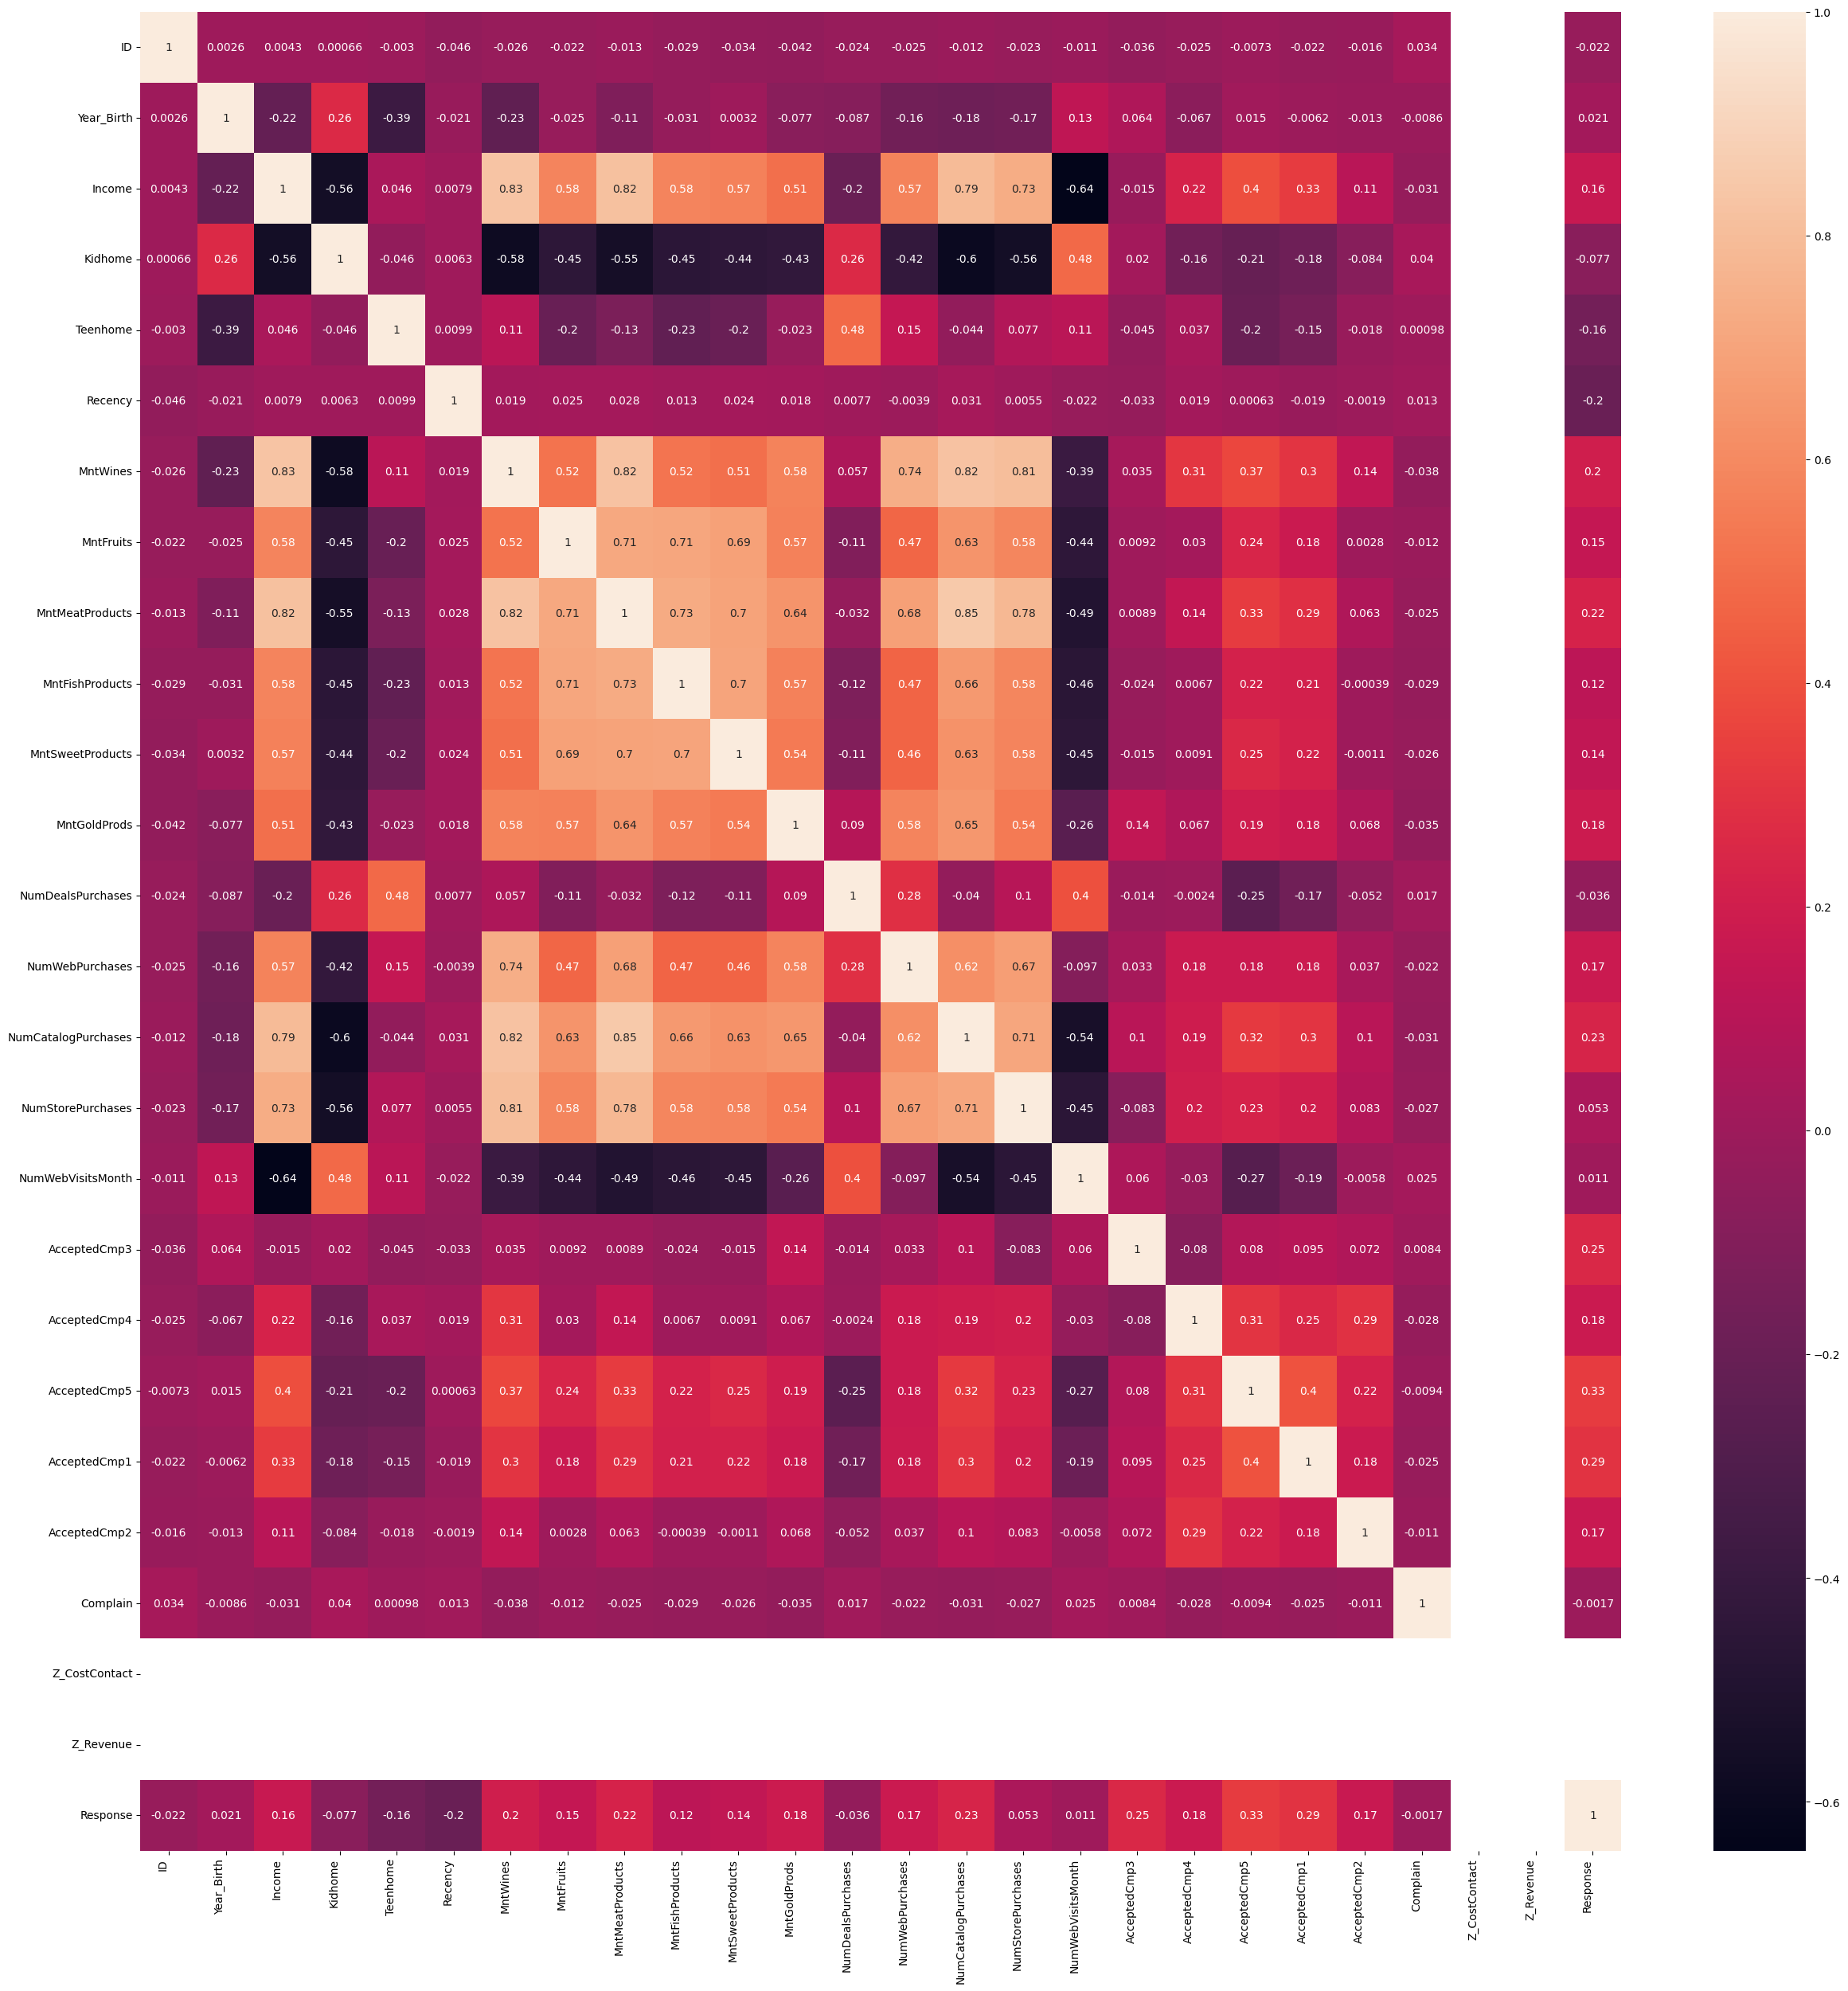

In [906]:
# menampilkan korelasi antar variabel
plt.figure(figsize=(30, 30))
sns.heatmap(numerik.corr(method='spearman'), annot=True)
plt.xticks(rotation=90, ha='right')  # Putar label sumbu x
plt.yticks(rotation=0)  # Label sumbu y tetap tegak
plt.show()

In [907]:
# ambil numerik saja
numerik = df.select_dtypes(include = 'number')

korelasi = numerik.corr('spearman')

# Filter korelasi yang memiliki nilai > 0.7 (menghilangkan diagonal dan nilai duplikat)
filtered_korelasi = korelasi.where((korelasi > 0.7) & (korelasi < 1))

# Menampilkan hasil
display(filtered_korelasi.dropna(how='all', axis=0).dropna(how='all', axis=1))

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Income,NaN,0.830056,NaN,0.816815,NaN,NaN,NaN,0.791841,0.731752
MntWines,0.830056,NaN,NaN,0.823652,NaN,NaN,0.740195,0.823421,0.806918
MntFruits,NaN,NaN,NaN,0.713169,0.705016,NaN,NaN,NaN,NaN
MntMeatProducts,0.816815,0.823652,0.713169,NaN,0.726242,NaN,NaN,0.851660,0.779336
MntFishProducts,NaN,NaN,0.705016,0.726242,NaN,0.700871,NaN,NaN,NaN
MntSweetProducts,NaN,NaN,NaN,NaN,0.700871,NaN,NaN,NaN,NaN
NumWebPurchases,NaN,0.740195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumCatalogPurchases,0.791841,0.823421,NaN,0.851660,NaN,NaN,NaN,NaN,0.708612
NumStorePurchases,0.731752,0.806918,NaN,0.779336,NaN,NaN,NaN,0.708612,NaN


Cek pasangan variabel yang memiliki korelasi > 0.7 dimana artinya kedua variabel memiliki korelasi yang cukup tinggi, yaitu:
- Income - MntWines
- Income - MntMeatProducts
- Income - NumCatalogPurchases
- Income - NumStorePurchases
- MntWines - MntMeatProducts
- MntWines - NumWebPurchases
- MntWines - NumCatalogPurchases
- MntWines - NumStorePurchases
- MntFruits - MntMeatProducts
- MntFruits - MntFishProducts
- MntMeatProducts - MntFishProducts
- MntMeatProducts - NumCatalogPurchases
- MntMeatProducts - NumStorePurchases
- MntFishProducts - MntSweetProducts
- NumCatalogPurchases - NumStorePurchases

## Variabel Kategorik

### Statistika Deskriptif

In [908]:
# statistika deskriptif variabel kategorik
df.describe(include = 'object')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


### Unique Values

In [909]:
# ambil semua yg kategorik
kategorik = df.select_dtypes(include = 'object')

# hitung unique values masing2 variabel
kategorik.nunique()

,0
Education,5
Marital_Status,8
Dt_Customer,663


### Value Counts

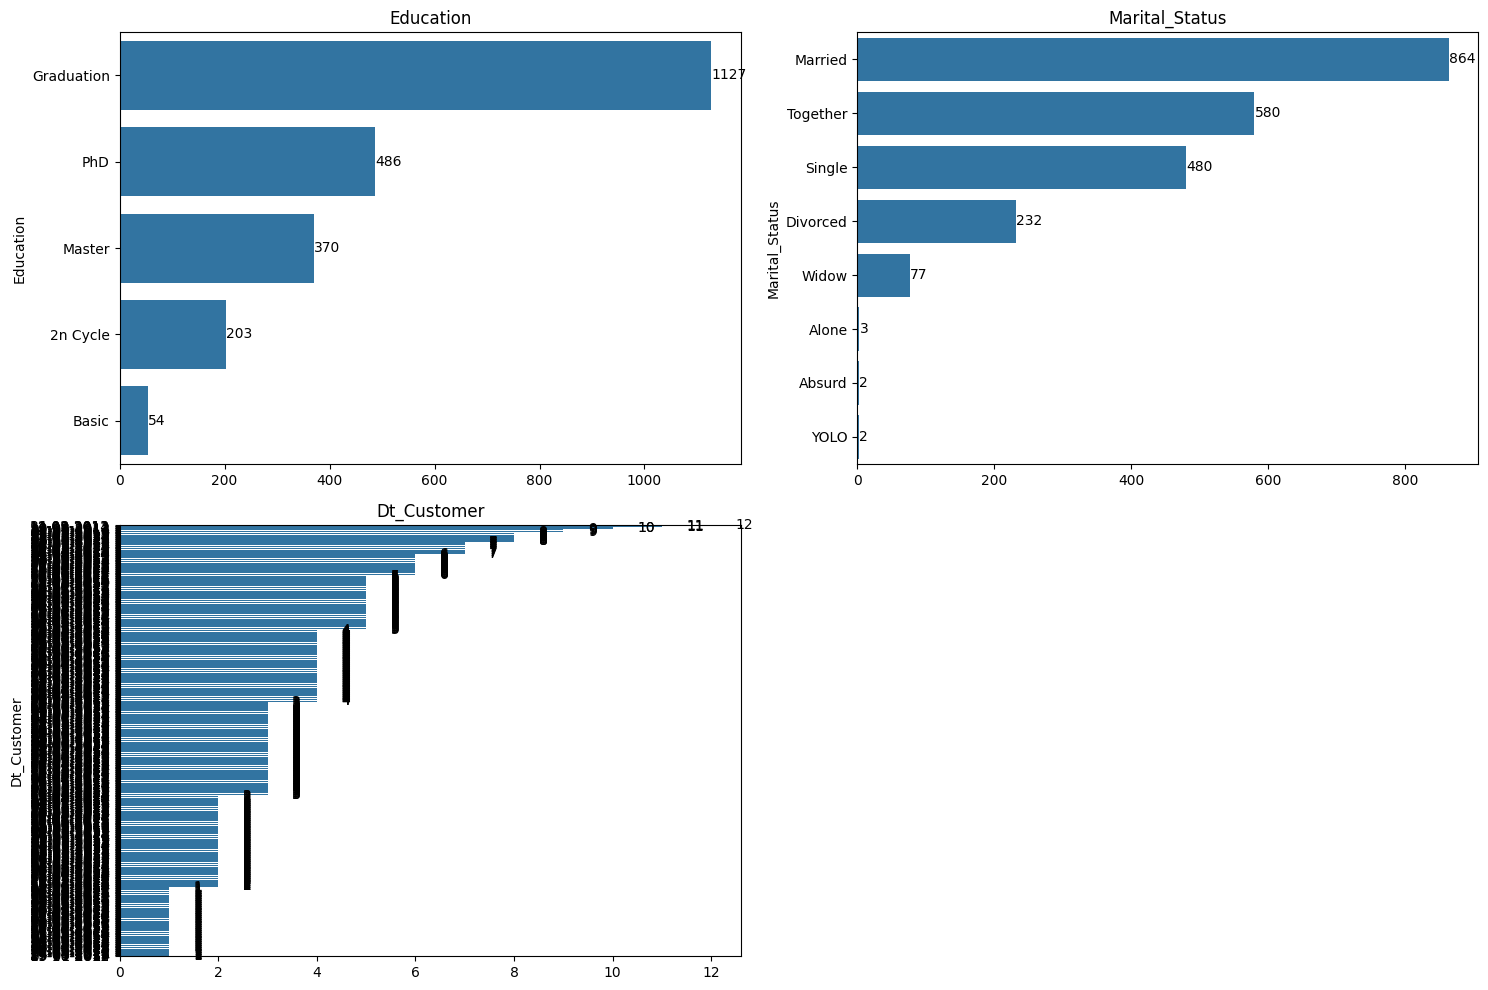

In [910]:
# Pilih kolom kategorik
kategorik = df.select_dtypes(include='object')

plt.figure(figsize=(15, 10))  # (lebar, tinggi)
posisi = 1
for kolom in kategorik.columns:
    plt.subplot(2, 2, posisi)  # (baris, kolom, posisi)

    # Ambil value counts untuk kategori
    value_counts = df[kolom].value_counts().sort_values(ascending=False)

    # Buat barplot
    ax = sns.barplot(x=value_counts.values, y=value_counts.index, orient='h')

    # Tambahkan anotasi pada setiap bar
    for i, value in enumerate(value_counts.values):
        plt.text(value + 0.5, i, str(value), va='center')  # Sesuaikan posisi angka

    plt.title(f"{kolom}")  # Tambahkan judul
    posisi += 1

# Memastikan grafik rapi
plt.tight_layout()
plt.show()

## Kesimpulan Data Understanding

1. Missing values hanya terdapat pada kolom income sebanyak 24 data dengan presentase 1.07% yang tergolong rendah. Hasil observasi memutuskan untuk mempertahankan baris data dengan mengisi data income null dengan rata-rata income sesuai dengan tingkat education customer.
2. Tidak ditemukan duplicated data.
3. Uji statistika menunjukkan data tersebar tidak normal.
4. Untuk outliers income dengan value 666666 akan diganti dengan rata-rata income sesuai tingkat pendidikan customer yang bersangkutan.
5. Untuk outliers Year_Birth akan dihapus karena dianggap sudah terlalu tua dan tidak berpotensi menjadi customer menjadi customer jangka panjang ke depan
6. Year Birth older than 1946 akan dihapus karena dianggap sama seperti outliers

## Data Cleaning

### Mengisi Income Null dengan rata-rata income per tingkat pendidikan

In [911]:
# Rata-rata income berdasarkan Education
ratarata_income = df.groupby('Education')['Income'].mean().round(1)
ratarata_income

,Income
Education,
2n Cycle,47633.2
Basic,20306.3
Graduation,52720.4
Master,52917.5
PhD,56145.3


In [912]:
# karena data tidak normal lebih cocok menggunakan median
median_income = df.groupby('Education')['Income'].median().round(1)
median_income

,Income
Education,
2n Cycle,46805.0
Basic,20744.0
Graduation,52028.5
Master,50943.0
PhD,55212.0


In [913]:
# cek data awal
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [914]:
# Pastikan kolom 'Income' dan 'Education' ada dalam dataframe
if 'Income' in df.columns and 'Education' in df.columns:
    # Grup berdasarkan Education, lalu hitung rata-rata Income untuk setiap kategori
    mean_income_per_education = df.groupby('Education')['Income'].mean()

    # Fungsi untuk mengisi nilai null dengan rata-rata berdasarkan kategori Education
    def fill_null_with_mean(row):
        if pd.isnull(row['Income']):  # Cek jika null
            return mean_income_per_education[row['Education']]
        return row['Income']

    # Terapkan fungsi untuk setiap baris pada kolom Income
    df['Income'] = df.apply(fill_null_with_mean, axis=1)

# Tampilkan dataframe yang diperbarui
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [915]:
# cek salah satu baris missing value apakah income nya sudah terisi
df[df['ID'] == 1994]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,52720.373656,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0


In [916]:
# cek jumlah null kolom income
df['Income'].isna().sum()

0

### Mengganti values income 666666 dengan rata-rata income sesuai education customer

In [917]:
df[df['Income'] == 666666]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,...,6,0,0,0,0,0,0,3,11,0


In [918]:
# Mengganti value income 666666.0 dengan median income Graduation 52028.5
df.loc[df['ID'] == 9432, 'Income'] = 52028.5

### Menghapus outliers Year_Birth dan Year_Birth <1946

In [919]:
# Menghapus baris dengan Year_Birth di bawah 1946 menggunakan dropna
df['Year_Birth'] = df['Year_Birth'].where(df['Year_Birth'] >1946)  # Tandai baris yang tidak memenuhi syarat sebagai NaN
df = df.dropna(subset=['Year_Birth'])  # Hapus baris dengan NaN di kolom Year_Birth
display(df)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957.0,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954.0,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965.0,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984.0,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981.0,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974.0,Graduation,Married,34421.0,1,0,01-07-2013,81,3,...,7,0,0,0,0,0,0,3,11,0
2235,10870,1967.0,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2237,7270,1981.0,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956.0,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### Menghapus Customer dengan Pembelian 0

In [920]:
# Verifikasi kolom pembelian dengan barang yang dibeli
datapembelianverif = df[(df['NumDealsPurchases']==0) & (df['NumWebPurchases']==0) & (df['NumCatalogPurchases']==0) & (df['NumStorePurchases']==0)]
datapembelianverif

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
655,5555,1975.0,Graduation,Divorced,153924.0,0,0,07-02-2014,81,1,...,0,0,0,0,0,0,0,3,11,0
981,3955,1965.0,Graduation,Divorced,4861.0,0,0,22-06-2014,20,2,...,14,0,0,0,0,0,0,3,11,0
1524,11110,1973.0,Graduation,Single,3502.0,1,0,13-04-2013,56,2,...,14,0,0,0,0,0,0,3,11,0
2132,11181,1949.0,PhD,Married,156924.0,0,0,29-08-2013,85,2,...,0,0,0,0,0,0,0,3,11,0


In [921]:
# Hapus ID Pelanggan 6555,3955,11110,11181 yang Memiliki Pembelian 0 Tetapi Pembelian Barang Terdapat Angka
df.drop([655,981,1524,2132],axis = 0,inplace=True)

In [922]:
df[(df['NumDealsPurchases']==0) & (df['NumWebPurchases']==0) & (df['NumCatalogPurchases']==0) & (df['NumStorePurchases']==0)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


### Menghapus Kolom Z_CostContact dan Z_Revenue

In [923]:
df.drop(['Z_CostContact','Z_Revenue'], axis=1, inplace=True)

In [924]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957.0,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954.0,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965.0,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984.0,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981.0,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974.0,Graduation,Married,34421.0,1,0,01-07-2013,81,3,...,0,2,7,0,0,0,0,0,0,0
2235,10870,1967.0,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,0,0,0,0,0,0
2237,7270,1981.0,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956.0,Master,Together,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,0,0,0,0,0,0


### Mengubah tipe data Dt_Cutomer menjadi datetime

In [925]:
# Konversi kolom Dt_Customer menjadi format datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [926]:
data.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Response
Non-Null Count  Dtype
--------------  -----
2240 non-null   int64
dtypes: int64(1)
memory usage: 17.6 KB


### Mengecek Recency yang tidak sesuai dengan Dt_Cust

In [927]:
# cek tanggal terakhir dalam data
tgl_sekarang = df['Dt_Customer'].max()
tgl_sekarang

Timestamp('2014-06-29 00:00:00')

In [928]:
# membuat kolom baru "Lama Menjadi Member" yang berisi jumlah hari setelah bergabung dengan tgl_sekarang - Dt_Customer untuk setiap ID, letakkan kolom di samping kolom Dt_Customer
# Check if the column already exists, if so, overwrite it
if 'Lama Menjadi Member' in df.columns:
    df['Lama Menjadi Member'] = (tgl_sekarang - df['Dt_Customer']).dt.days
else:
    df.insert(2, 'Lama Menjadi Member', (tgl_sekarang - df['Dt_Customer']).dt.days)
display(df)

,ID,Year_Birth,Lama Menjadi Member,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957.0,663,Graduation,Single,58138.0,0,0,2012-09-04,58,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954.0,113,Graduation,Single,46344.0,1,1,2014-03-08,38,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965.0,312,Graduation,Together,71613.0,0,0,2013-08-21,26,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984.0,139,Graduation,Together,26646.0,1,0,2014-02-10,26,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981.0,161,PhD,Married,58293.0,1,0,2014-01-19,94,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974.0,363,Graduation,Married,34421.0,1,0,2013-07-01,81,...,0,2,7,0,0,0,0,0,0,0
2235,10870,1967.0,381,Graduation,Married,61223.0,0,1,2013-06-13,46,...,3,4,5,0,0,0,0,0,0,0
2237,7270,1981.0,155,Graduation,Divorced,56981.0,0,0,2014-01-25,91,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956.0,156,Master,Together,69245.0,0,1,2014-01-24,8,...,5,10,3,0,0,0,0,0,0,0


In [929]:
# tampilkan baris yang recency > Lama Menjadi Member
df[df['Recency'] > df['Lama Menjadi Member']]

,ID,Year_Birth,Lama Menjadi Member,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
45,1371,1976.0,1,Graduation,Single,79941.000000,0,0,2014-06-28,72,...,4,9,1,0,0,0,0,0,0,0
53,2225,1977.0,22,Graduation,Divorced,82582.000000,0,0,2014-06-07,54,...,9,7,1,1,0,0,1,0,0,1
88,8504,1973.0,48,Graduation,Married,79593.000000,0,0,2014-05-12,70,...,6,7,2,0,0,1,0,0,0,0
91,9235,1957.0,33,Graduation,Single,52720.373656,1,1,2014-05-27,45,...,0,2,7,0,0,0,0,0,0,0
94,2230,1970.0,36,PhD,Married,23626.000000,1,0,2014-05-24,84,...,1,3,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,2115,1957.0,9,Graduation,Together,50116.000000,1,1,2014-06-20,68,...,0,4,5,0,1,0,0,0,0,0
2182,3266,1964.0,67,Graduation,Married,42523.000000,0,0,2014-04-23,96,...,1,4,2,0,0,0,0,0,0,0
2187,5721,1956.0,49,PhD,Married,84117.000000,0,0,2014-05-11,60,...,10,6,2,0,0,1,0,0,0,0
2199,9014,1975.0,3,Graduation,Married,37085.000000,1,1,2014-06-26,65,...,0,3,8,0,0,0,0,0,0,0


In [930]:
df

,ID,Year_Birth,Lama Menjadi Member,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957.0,663,Graduation,Single,58138.0,0,0,2012-09-04,58,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954.0,113,Graduation,Single,46344.0,1,1,2014-03-08,38,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965.0,312,Graduation,Together,71613.0,0,0,2013-08-21,26,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984.0,139,Graduation,Together,26646.0,1,0,2014-02-10,26,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981.0,161,PhD,Married,58293.0,1,0,2014-01-19,94,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974.0,363,Graduation,Married,34421.0,1,0,2013-07-01,81,...,0,2,7,0,0,0,0,0,0,0
2235,10870,1967.0,381,Graduation,Married,61223.0,0,1,2013-06-13,46,...,3,4,5,0,0,0,0,0,0,0
2237,7270,1981.0,155,Graduation,Divorced,56981.0,0,0,2014-01-25,91,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956.0,156,Master,Together,69245.0,0,1,2014-01-24,8,...,5,10,3,0,0,0,0,0,0,0


In [931]:
# ubah value kolom 'Recency' pada baris yang sama yang memiliki 'Recency'>'Lama Menjadi Member' dengan value 'Lama Menjadi Member' pada baris yang sama
df.loc[df['Recency'] > df['Lama Menjadi Member'], 'Recency'] = df.loc[df['Recency'] > df['Lama Menjadi Member'], 'Lama Menjadi Member']
df

,ID,Year_Birth,Lama Menjadi Member,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957.0,663,Graduation,Single,58138.0,0,0,2012-09-04,58,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954.0,113,Graduation,Single,46344.0,1,1,2014-03-08,38,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965.0,312,Graduation,Together,71613.0,0,0,2013-08-21,26,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984.0,139,Graduation,Together,26646.0,1,0,2014-02-10,26,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981.0,161,PhD,Married,58293.0,1,0,2014-01-19,94,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974.0,363,Graduation,Married,34421.0,1,0,2013-07-01,81,...,0,2,7,0,0,0,0,0,0,0
2235,10870,1967.0,381,Graduation,Married,61223.0,0,1,2013-06-13,46,...,3,4,5,0,0,0,0,0,0,0
2237,7270,1981.0,155,Graduation,Divorced,56981.0,0,0,2014-01-25,91,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956.0,156,Master,Together,69245.0,0,1,2014-01-24,8,...,5,10,3,0,0,0,0,0,0,0


In [932]:
# cek baris dengan ID 1371
df[df['ID'] == 1371]

,ID,Year_Birth,Lama Menjadi Member,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
45,1371,1976.0,1,Graduation,Single,79941.0,0,0,2014-06-28,1,...,4,9,1,0,0,0,0,0,0,0


Ditemukan 143 data yang recency > Dt_Customer, dimana ini dirasa tidak masuk akal, karena umumnya orang menjadi member terlebih dahulu baru datanya dapat tersimpan, apabila belum menjadi member maka data customer tidak akan tersimpan sesuai ID cust. Sehingga value recency > Dt_Cust akan diubah menjadi value Lama Menjadi Member.

### Data Cleaned

In [933]:
import pandas as pd

listItem = []
for col in df.columns:
    num_unique = df[col].nunique()  # Get the number of unique values
    sample_size = min(num_unique, 2)  # Take a sample of at most 2, or fewer if there are less unique values

    listItem.append([col,
                     df[col].dtype,
                     df[col].isna().sum(),
                     num_unique,
                     list(df[col].drop_duplicates().sample(sample_size, replace=False, random_state=1).values)])
    # Sample with replacement if sample_size is larger than the number of unique values

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(2193, 28)


,dataFeatures,dataType,null,unique,uniqueSample
0,ID,int64,0,2193,"[5721, 2392]"
1,Year_Birth,float64,0,50,"[1996.0, 1948.0]"
2,Lama Menjadi Member,int64,0,663,"[679, 658]"
3,Education,object,0,5,"[Master, PhD]"
4,Marital_Status,object,0,8,"[YOLO, Married]"
5,Income,float64,0,1939,"[67472.0, 72099.0]"
6,Kidhome,int64,0,3,"[0, 2]"
7,Teenhome,int64,0,3,"[0, 2]"
8,Dt_Customer,datetime64[ns],0,663,"[2012-08-19T00:00:00.000000000, 2012-09-09T00:..."
9,Recency,int64,0,100,"[64, 77]"


Sebelum dibersihkan kita memiliki 2240 baris data, sekarang kita memiliki 2193 baris data.

# Data Analysis

Karakteristik customer berdasarkan preferensi metode belanja

### Cek Variabel Utama : Metode Belanja

- NumWebPurchases: Jumlah pembelian melalui website.
- NumCatalogPurchases: Jumlah pembelian menggunakan katalog.
- NumStorePurchases: Jumlah pembelian langsung di toko.
- NumWebVisitsMonth: Jumlah kunjungan ke website dalam satu bulan terakhir.

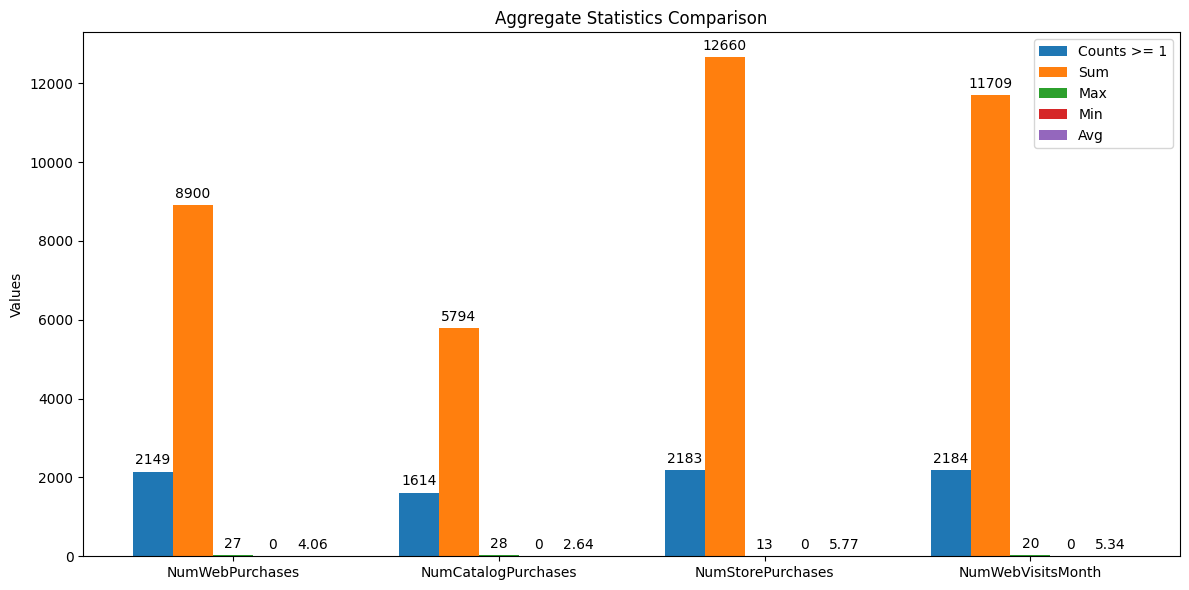

In [934]:
selected_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Calculate statistics for all selected columns
stats_data = []
for column in selected_columns:
    stats_data.append({
        'Column': column,
        'Counts >= 1': df[column][df[column] >= 1].count(),
        'Sum': df[column].sum(),
        'Max': df[column].max(),
        'Min': df[column].min(),
        'Avg': df[column].mean()
    })

stats_df = pd.DataFrame(stats_data)
stats_df.set_index('Column', inplace=True)

# Create the bar plot
x = np.arange(len(selected_columns))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - 2*width, stats_df['Counts >= 1'], width, label='Counts >= 1')
rects2 = ax.bar(x - width, stats_df['Sum'], width, label='Sum')
rects3 = ax.bar(x, stats_df['Max'], width, label='Max')
rects4 = ax.bar(x + width, stats_df['Min'], width, label='Min')
rects5 = ax.bar(x + 2*width, stats_df['Avg'], width, label='Avg')

# Add labels, title, and legend
ax.set_ylabel('Values')
ax.set_title('Aggregate Statistics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(selected_columns)
ax.legend()

# Add value labels above bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(int(height) if height.is_integer() else '{:.2f}'.format(height)),  # Format label
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

fig.tight_layout()
plt.show()

Dari data diatas dapat diketahui:
- Pembelian store offline merupakan metode belanja paling populer dibandingkan via web dan catalog baik dari jumlah customer(counts) maupun total kunjungan(sum). Artinya pola perilaku belanja customer supermarket kita masih menyukai pembelian fisik langsung di toko.
-Jumlah cust yang melakukan transaksi via web (count NumWebPurchases) lebih rendah dibandingkan jumlah cust yang visit customer ke web (count NumWebVisitsMonth). Jumlah transaksi via web (sum) juga lebih rendah daripada jumlah kunjungan web (sum). Artinya tidak setiap kali customer yang visit website melakukan pembelian.


In [935]:
# Dapatkan jumlah cust berdasarkan metode belanja cust dengan cara ambil kolom yang diantara store,web,catalog yang paling besar
# Columns to compare
columns_to_compare = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Assuming 'df' is the intended DataFrame, replace 'df_corrected' with 'df'
df['Count Customer Preference'] = df[columns_to_compare].idxmax(axis=1)

# Count the occurrences of each preference category
preference_counts = df['Count Customer Preference'].value_counts()

# Display the counts
display(preference_counts)

,count
Count Customer Preference,
NumStorePurchases,1456
NumWebPurchases,584
NumCatalogPurchases,153


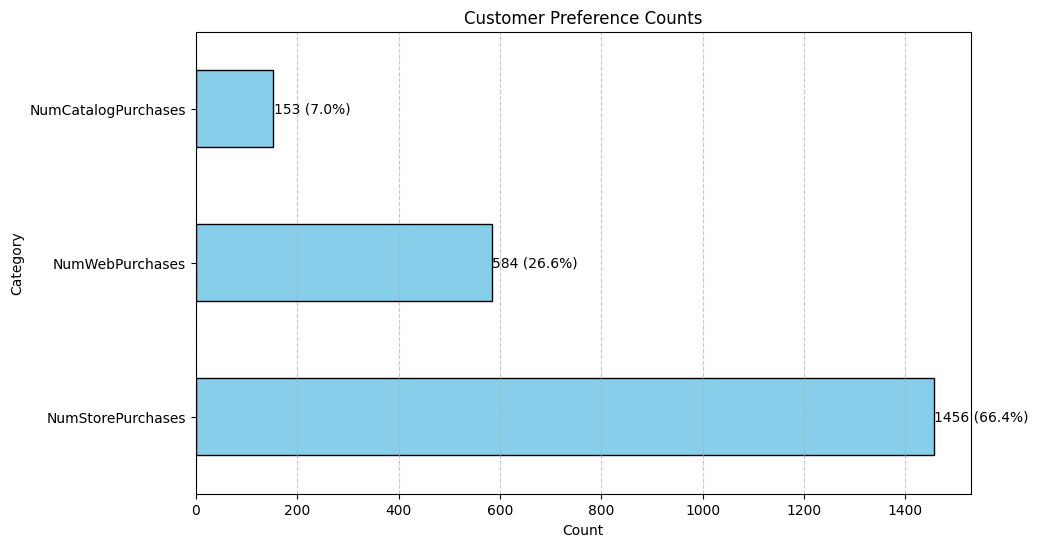

In [936]:
# Bar plot of customer preferences
ax = preference_counts.plot(kind='barh', color='skyblue', edgecolor='black', figsize=(10, 6)) # changed kind to 'barh'

plt.title('Customer Preference Counts')
plt.xlabel('Count') # swapped x and y labels
plt.ylabel('Category') # swapped x and y labels
plt.grid(axis='x', linestyle='--', alpha=0.7) # grid on x-axis

# Calculate total count for percentages
total = preference_counts.sum()

# Add value labels and percentages beside bars
for p in ax.patches:
    width = p.get_width()
    percentage = (width / total) * 100  # Calculate percentage
    plt.text(width + 1, p.get_y() + p.get_height() / 2,
             '{:1.0f} ({:.1f}%)'.format(width, percentage), ha='left', va='center')  # format and position text

plt.show()

Dari data diatas terlihat bahwa sebagian besar customer supermarket memiliki preferensi belanja secara langsung di store.

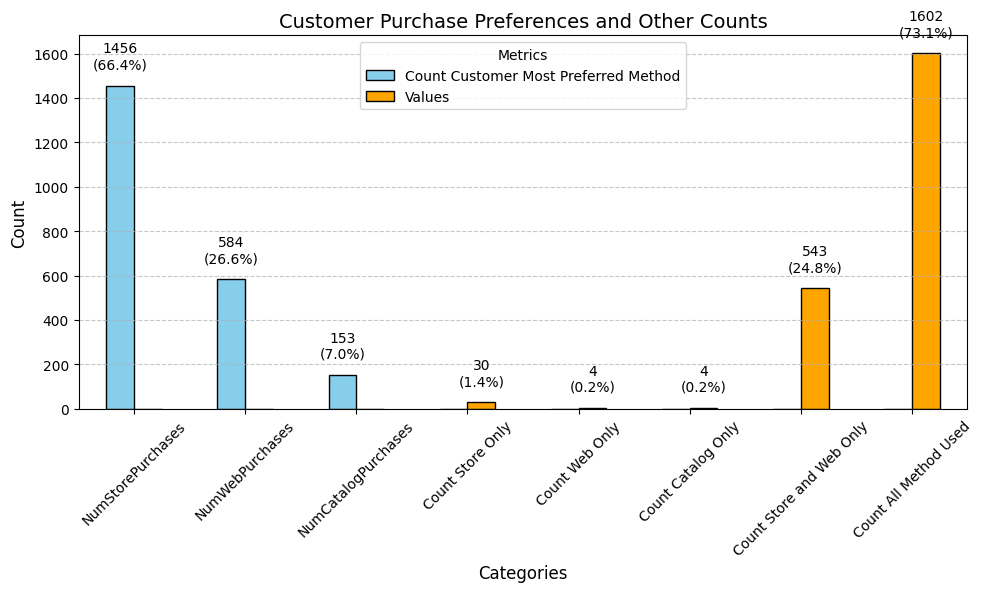

In [937]:
import matplotlib.pyplot as plt

# Drop unnecessary columns
dropped_columns = ['NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases']
filtered_results_df = results_df.drop(columns=dropped_columns, errors='ignore')

# Plot the results
ax = filtered_results_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'], edgecolor='black')

# Customize the plot
plt.title('Customer Purchase Preferences and Other Counts', fontsize=14)
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metrics', fontsize=10, loc='upper center', bbox_to_anchor=(0.5, 1))

# Calculate the total number of customers
# Instead of df.count(), use df.shape[0] to get the total number of rows (customers)
total_customers = df.shape[0]

# Add value annotations and percentages on each bar
for p in ax.patches:
    height = p.get_height()  # Get the height of the bar
    if height != 0:  # Only annotate if height is not 0
        percentage = (height / total_customers) * 100  # Calculate percentage based on total customers

        # Add value annotations
        ax.annotate(
            f'{height:.0f}\n({percentage:.1f}%)',  # Show value and percentage
            (p.get_x() + p.get_width() / 2., height),  # Position above the bar
            ha='center', va='bottom', fontsize=10, color='black',
            xytext=(0, 10),  # Adjust the vertical offset
            textcoords='offset points'
        )

# Show the plot
plt.tight_layout()
plt.show()

Dari data diatas dapat diketahui bahwa sebagian besar customer sudah mencoba semua metode belanja dan metode paling banyak dilakukan adalah metode belanja di store.

Bagi segmen preferensi metode belanja

- Store : Pembelian terbanyak di store
- Web : Pembelian terbanyak di Web
- Catalog : Pembelian terbanyak di Catalog

In [938]:
# membuat kolom baru untuk menentukan membuat segmentasi customer berdasarkan preferensi metode belanja
def get_preferred_method(row):
    """
    Function to determine the preferred shopping method based on purchase counts.
    """
    if row['NumStorePurchases'] > row['NumWebPurchases'] and row['NumStorePurchases'] > row['NumCatalogPurchases']:
        return 'Store'
    elif row['NumWebPurchases'] > row['NumStorePurchases'] and row['NumWebPurchases'] > row['NumCatalogPurchases']:
        return 'Web'
    elif row['NumCatalogPurchases'] > row['NumStorePurchases'] and row['NumCatalogPurchases'] > row['NumWebPurchases']:
        return 'Catalog'
        # apabila 'NumStorePurchases' dan 'NumWebPurchases' imbang maka return 'Web'
    elif row['NumStorePurchases'] == row['NumWebPurchases'] and row['NumStorePurchases'] > row['NumCatalogPurchases']:
        return 'Web'
        # apabila 'NumWebPurchases' dan 'NumCatalogPurchases' imbang maka return 'Web'
    elif row['NumWebPurchases'] == row['NumCatalogPurchases'] and row['NumWebPurchases'] > row['NumStorePurchases']:
        return 'Web'
        # apabila 'NumStorePurchases' dan 'NumCatalogPurchases' imbang maka return 'Store'
    elif row['NumStorePurchases'] == row['NumCatalogPurchases'] and row['NumStorePurchases'] > row['NumWebPurchases']:
        return 'Store'
    else:
        return 'Web'  # Apabila ada ties maka kita anggap memiliki preferensi metode belanja web

# Apply the function to create the new column
df['Preferensi Metode Belanja'] = df.apply(get_preferred_method, axis=1)
df

,ID,Year_Birth,Lama Menjadi Member,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Count Customer Preference,Preferensi Metode Belanja
0,5524,1957.0,663,Graduation,Single,58138.0,0,0,2012-09-04,58,...,7,0,0,0,0,0,0,1,NumCatalogPurchases,Catalog
1,2174,1954.0,113,Graduation,Single,46344.0,1,1,2014-03-08,38,...,5,0,0,0,0,0,0,0,NumStorePurchases,Store
2,4141,1965.0,312,Graduation,Together,71613.0,0,0,2013-08-21,26,...,4,0,0,0,0,0,0,0,NumStorePurchases,Store
3,6182,1984.0,139,Graduation,Together,26646.0,1,0,2014-02-10,26,...,6,0,0,0,0,0,0,0,NumStorePurchases,Store
4,5324,1981.0,161,PhD,Married,58293.0,1,0,2014-01-19,94,...,5,0,0,0,0,0,0,0,NumStorePurchases,Store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974.0,363,Graduation,Married,34421.0,1,0,2013-07-01,81,...,7,0,0,0,0,0,0,0,NumStorePurchases,Store
2235,10870,1967.0,381,Graduation,Married,61223.0,0,1,2013-06-13,46,...,5,0,0,0,0,0,0,0,NumWebPurchases,Web
2237,7270,1981.0,155,Graduation,Divorced,56981.0,0,0,2014-01-25,91,...,6,0,1,0,0,0,0,0,NumStorePurchases,Store
2238,8235,1956.0,156,Master,Together,69245.0,0,1,2014-01-24,8,...,3,0,0,0,0,0,0,0,NumStorePurchases,Store


In [941]:
# drop kolom 'Count Customer Preference' dan 'Count Customer Most Preferred Method' karena tidak digunakan
df.drop(['Count Customer Preference'], axis=1, inplace=True)
df

,ID,Year_Birth,Lama Menjadi Member,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Preferensi Metode Belanja
0,5524,1957.0,663,Graduation,Single,58138.0,0,0,2012-09-04,58,...,4,7,0,0,0,0,0,0,1,Catalog
1,2174,1954.0,113,Graduation,Single,46344.0,1,1,2014-03-08,38,...,2,5,0,0,0,0,0,0,0,Store
2,4141,1965.0,312,Graduation,Together,71613.0,0,0,2013-08-21,26,...,10,4,0,0,0,0,0,0,0,Store
3,6182,1984.0,139,Graduation,Together,26646.0,1,0,2014-02-10,26,...,4,6,0,0,0,0,0,0,0,Store
4,5324,1981.0,161,PhD,Married,58293.0,1,0,2014-01-19,94,...,6,5,0,0,0,0,0,0,0,Store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974.0,363,Graduation,Married,34421.0,1,0,2013-07-01,81,...,2,7,0,0,0,0,0,0,0,Store
2235,10870,1967.0,381,Graduation,Married,61223.0,0,1,2013-06-13,46,...,4,5,0,0,0,0,0,0,0,Web
2237,7270,1981.0,155,Graduation,Divorced,56981.0,0,0,2014-01-25,91,...,13,6,0,1,0,0,0,0,0,Store
2238,8235,1956.0,156,Master,Together,69245.0,0,1,2014-01-24,8,...,10,3,0,0,0,0,0,0,0,Store


### Segmentasi Berdasarkan Variabel Demografis

Bandingkan pola pembelian dengan variabel berikut untuk memahami karakteristik demografis pelanggan:

- Year_Birth: Kelompokkan pelanggan berdasarkan usia (misalnya, generasi atau dekade kelahiran).
- Education: Kelompokkan pelanggan berdasarkan tingkat pendidikan
- Marital_Status: Kelompokkan pelanggan berdasarkan status perkawinan
- Income: Kelompokkan pelanggan berdasarkan penghasilan

#### Usia

Pemabagian segmen usia:
- Baby Boomer : 1946 - 1964
- Gen X : 1965 - 1980
- Gen Y / Millenial : 1981 - 1996






In [942]:
# buat kolom baru dengan nama kolom "Generasi" dimana isi valuenya adalah apabila "Year_Birth" valuenya 1946 - 1964 maka "Baby Boomer", apabila valuenya 1965 - 1980 maka "Gen X", apabila valuenya 1981 - 1996 maka "Millenial"
df['Generasi'] = df['Year_Birth'].apply(lambda x: 'Baby Boomer' if 1946 <= x <= 1964 else
                                          ('Gen X' if 1965 <= x <= 1980 else
                                           'Millenial'))
df

,ID,Year_Birth,Lama Menjadi Member,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Preferensi Metode Belanja,Generasi
0,5524,1957.0,663,Graduation,Single,58138.0,0,0,2012-09-04,58,...,7,0,0,0,0,0,0,1,Catalog,Baby Boomer
1,2174,1954.0,113,Graduation,Single,46344.0,1,1,2014-03-08,38,...,5,0,0,0,0,0,0,0,Store,Baby Boomer
2,4141,1965.0,312,Graduation,Together,71613.0,0,0,2013-08-21,26,...,4,0,0,0,0,0,0,0,Store,Gen X
3,6182,1984.0,139,Graduation,Together,26646.0,1,0,2014-02-10,26,...,6,0,0,0,0,0,0,0,Store,Millenial
4,5324,1981.0,161,PhD,Married,58293.0,1,0,2014-01-19,94,...,5,0,0,0,0,0,0,0,Store,Millenial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974.0,363,Graduation,Married,34421.0,1,0,2013-07-01,81,...,7,0,0,0,0,0,0,0,Store,Gen X
2235,10870,1967.0,381,Graduation,Married,61223.0,0,1,2013-06-13,46,...,5,0,0,0,0,0,0,0,Web,Gen X
2237,7270,1981.0,155,Graduation,Divorced,56981.0,0,0,2014-01-25,91,...,6,0,1,0,0,0,0,0,Store,Millenial
2238,8235,1956.0,156,Master,Together,69245.0,0,1,2014-01-24,8,...,3,0,0,0,0,0,0,0,Store,Baby Boomer


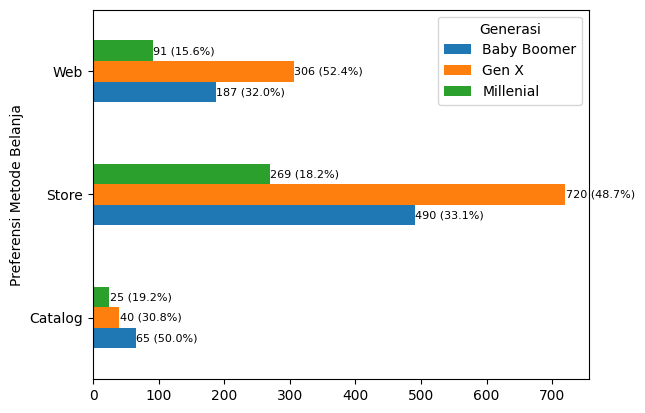

In [943]:
# Create the horizontal bar chart
ax = df.groupby('Preferensi Metode Belanja')['Generasi'].value_counts().unstack().plot(kind='barh', stacked=False)

# Annotate bars with count and percentage
for p in ax.patches:
    width = p.get_width()  # Get the bar width (count)

    # Get the category label for this bar
    category = df['Preferensi Metode Belanja'].unique()[int(p.get_y() + 0.5)]  # +0.5 for rounding

    # Calculate percentage based on total for that category
    total = df['Preferensi Metode Belanja'].value_counts()[category]  # Total for the preference
    percentage = (width / total) * 100 if total else 0  # Avoid division by zero

    # Add annotation: Count (Percentage)
    ax.annotate(f'{int(width)} ({percentage:.1f}%)',  # Format annotation text
                (width + 1, p.get_y() + p.get_height() / 2),  # Position annotation
                ha='left', va='center', fontsize=8)  # Style annotation

plt.show()

Gen X mendominasi pada preferensi belanja Web (52.4.8%) dan Store (48.7%) hingga hampir separuhnya , disusul dengan Millenial kemudian Baby Boomer. Proporsi generasi pada preferensi pembelian Web dan Store terdapat kemiripan.

#### Pendidikan

In [944]:
# melihat value count pada kolom Education
display(df['Education'].value_counts())

,count
Education,
Graduation,1114
PhD,463
Master,361
2n Cycle,201
Basic,54


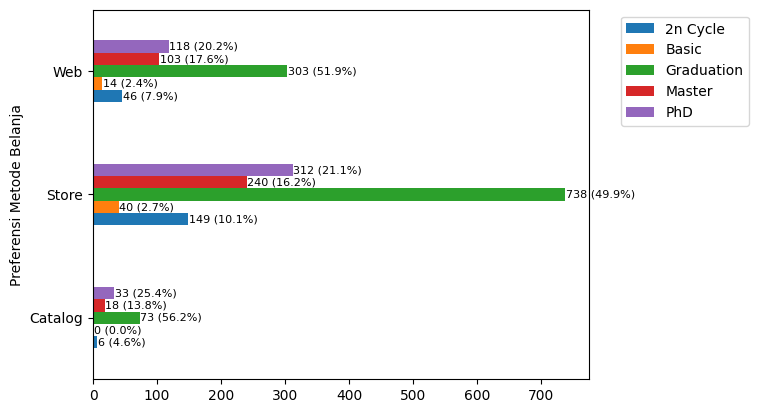

In [945]:
# Create the horizontal bar chart
ax = df.groupby('Preferensi Metode Belanja')['Education'].value_counts().unstack().plot(kind='barh', stacked=False)

# Annotate bars with count and percentage
for p in ax.patches:
    width = p.get_width()  # Get the bar width (count)

    # Get the category label for this bar
    category = df['Preferensi Metode Belanja'].unique()[int(p.get_y() + 0.5)]  # +0.5 for rounding

    # Calculate percentage based on total for that category
    total = df['Preferensi Metode Belanja'].value_counts()[category]  # Total for the preference
    percentage = (width / total) * 100 if total else 0  # Avoid division by zero

    # Add annotation: Count (Percentage)
    ax.annotate(f'{int(width)} ({percentage:.1f}%)',  # Format annotation text
                (width + 1, p.get_y() + p.get_height() / 2),  # Position annotation
                ha='left', va='center', fontsize=8)  # Style annotation

# Adjust legend position
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Tingkat pendidikan Graduation mendominasi pada semua preferensi metode belanja. Terdapat kemiripan proporsi tingkat pendidikan pada preferensi Web dan Store.

#### Status Pernikahan

In [946]:
# melihat value count pada kolom Marital Status
display(df['Marital_Status'].value_counts())

,count
Marital_Status,
Married,846
Together,571
Single,470
Divorced,226
Widow,73
Alone,3
Absurd,2
YOLO,2


Pembagian segmen Status:

- In Relationship = Married, Together
- Not In Relationship = Single, Divorced, Widow, Alone, Absurd, YOLO

In [947]:
# membuat kolom baru dengan nama kolom "Status" dimana baris kolom "Marital_Status" yang memiliki value Married,Together diberi value "In Relationship" dan yang memiliki value selain itu diberi value "Not In Relationship"
df['Status'] = df['Marital_Status'].apply(lambda x: 'In Relationship' if x in ['Married', 'Together'] else 'Not In Relationship')
df

,ID,Year_Birth,Lama Menjadi Member,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Preferensi Metode Belanja,Generasi,Status
0,5524,1957.0,663,Graduation,Single,58138.0,0,0,2012-09-04,58,...,0,0,0,0,0,0,1,Catalog,Baby Boomer,Not In Relationship
1,2174,1954.0,113,Graduation,Single,46344.0,1,1,2014-03-08,38,...,0,0,0,0,0,0,0,Store,Baby Boomer,Not In Relationship
2,4141,1965.0,312,Graduation,Together,71613.0,0,0,2013-08-21,26,...,0,0,0,0,0,0,0,Store,Gen X,In Relationship
3,6182,1984.0,139,Graduation,Together,26646.0,1,0,2014-02-10,26,...,0,0,0,0,0,0,0,Store,Millenial,In Relationship
4,5324,1981.0,161,PhD,Married,58293.0,1,0,2014-01-19,94,...,0,0,0,0,0,0,0,Store,Millenial,In Relationship
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974.0,363,Graduation,Married,34421.0,1,0,2013-07-01,81,...,0,0,0,0,0,0,0,Store,Gen X,In Relationship
2235,10870,1967.0,381,Graduation,Married,61223.0,0,1,2013-06-13,46,...,0,0,0,0,0,0,0,Web,Gen X,In Relationship
2237,7270,1981.0,155,Graduation,Divorced,56981.0,0,0,2014-01-25,91,...,0,1,0,0,0,0,0,Store,Millenial,Not In Relationship
2238,8235,1956.0,156,Master,Together,69245.0,0,1,2014-01-24,8,...,0,0,0,0,0,0,0,Store,Baby Boomer,In Relationship


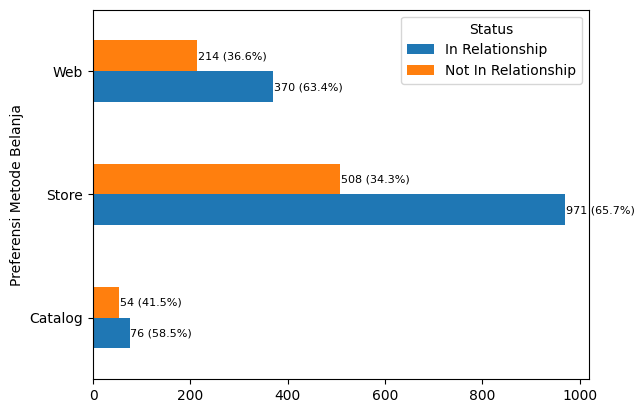

In [948]:
# Create the horizontal bar chart
ax = df.groupby('Preferensi Metode Belanja')['Status'].value_counts().unstack().plot(kind='barh', stacked=False)

# Annotate bars with count and percentage
for p in ax.patches:
    width = p.get_width()  # Get the bar width (count)

    # Get the category label for this bar
    category = df['Preferensi Metode Belanja'].unique()[int(p.get_y() + 0.5)]  # +0.5 for rounding

    # Calculate percentage based on total for that category
    total = df['Preferensi Metode Belanja'].value_counts()[category]  # Total for the preference
    percentage = (width / total) * 100 if total else 0  # Avoid division by zero

    # Add annotation: Count (Percentage)
    ax.annotate(f'{int(width)} ({percentage:.1f}%)',  # Format annotation text
                (width + 1, p.get_y() + p.get_height() / 2),  # Position annotation
                ha='left', va='center', fontsize=8)  # Style annotation

plt.show()

In Relationship mendominasi pada semua preferensi metode belanja. Proporsi status pada preferensi metode belanja Web dan Store terdapat kemiripan.

#### Penghasilan

Pembagian segmen Penghasilan:

Above Median = Customer dengan penghasilan diatas median
Below Median = Customer dengan penghasilan dibawah median

In [949]:
# membuat kolom baru dengan nama kolom "Penghasilan" dimana baris kolom "Income" yang memiliki value diatas median income diberi value "Above median" dan yang memiliki value selain itu diberi value "Below median"
df['Penghasilan'] = df['Income'].apply(lambda x: 'Above median' if x > df['Income'].median() else 'Below median')
df

,ID,Year_Birth,Lama Menjadi Member,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Preferensi Metode Belanja,Generasi,Status,Penghasilan
0,5524,1957.0,663,Graduation,Single,58138.0,0,0,2012-09-04,58,...,0,0,0,0,0,1,Catalog,Baby Boomer,Not In Relationship,Above median
1,2174,1954.0,113,Graduation,Single,46344.0,1,1,2014-03-08,38,...,0,0,0,0,0,0,Store,Baby Boomer,Not In Relationship,Below median
2,4141,1965.0,312,Graduation,Together,71613.0,0,0,2013-08-21,26,...,0,0,0,0,0,0,Store,Gen X,In Relationship,Above median
3,6182,1984.0,139,Graduation,Together,26646.0,1,0,2014-02-10,26,...,0,0,0,0,0,0,Store,Millenial,In Relationship,Below median
4,5324,1981.0,161,PhD,Married,58293.0,1,0,2014-01-19,94,...,0,0,0,0,0,0,Store,Millenial,In Relationship,Above median
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974.0,363,Graduation,Married,34421.0,1,0,2013-07-01,81,...,0,0,0,0,0,0,Store,Gen X,In Relationship,Below median
2235,10870,1967.0,381,Graduation,Married,61223.0,0,1,2013-06-13,46,...,0,0,0,0,0,0,Web,Gen X,In Relationship,Above median
2237,7270,1981.0,155,Graduation,Divorced,56981.0,0,0,2014-01-25,91,...,1,0,0,0,0,0,Store,Millenial,Not In Relationship,Above median
2238,8235,1956.0,156,Master,Together,69245.0,0,1,2014-01-24,8,...,0,0,0,0,0,0,Store,Baby Boomer,In Relationship,Above median


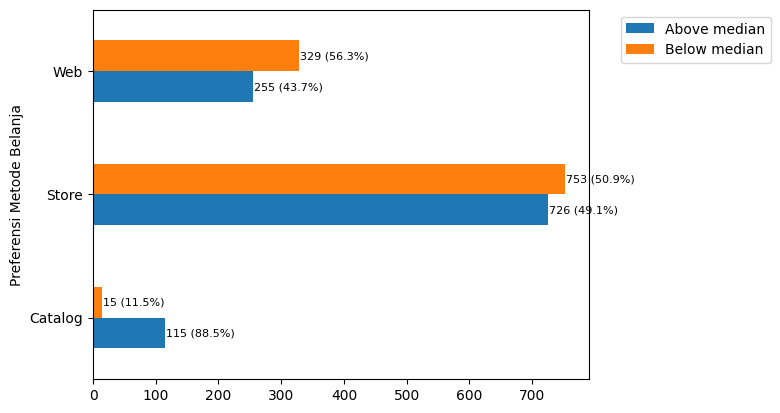

In [950]:
# Create the horizontal bar chart
ax = df.groupby('Preferensi Metode Belanja')['Penghasilan'].value_counts().unstack().plot(kind='barh', stacked=False)

# Annotate bars with count and percentage
for p in ax.patches:
    width = p.get_width()  # Get the bar width (count)

    # Get the category label for this bar
    category = df['Preferensi Metode Belanja'].unique()[int(p.get_y() + 0.5)]  # +0.5 for rounding

    # Calculate percentage based on total for that category
    total = df['Preferensi Metode Belanja'].value_counts()[category]  # Total for the preference
    percentage = (width / total) * 100 if total else 0  # Avoid division by zero

    # Add annotation: Count (Percentage)
    ax.annotate(f'{int(width)} ({percentage:.1f}%)',  # Format annotation text
                (width + 1, p.get_y() + p.get_height() / 2),  # Position annotation
                ha='left', va='center', fontsize=8)  # Style annotation

# Adjust legend position
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Presentase income pada preferensi metode belanja Web dan Store didominasi dengan Below Median, Web (56.3%) dan Store (50.9%).

### Segmentasi Berdasarkan Struktur Keluarga

Pembagian segmen Status:

- With Kids  = Keluarga dengan Kidhome dan atau Teenhome
- No Kid = Keluarga tanpa Kidhome dan Teenhome

Kidhome dan Teenhome dianggap setara karena keduanya merupakan tanggungan orang tua

In [951]:
# membuat kolom baru dengan nama kolom "Struktur Keluarga" dimana apabila kolom "Kidhome" dan "Teenhome" memiliki value diatas => 1 maka diberi value "With Kids" dan yang memiliki value selain itu diberi value "No Kid"
df['Struktur Keluarga'] = df.apply(lambda row: 'With Kids' if row['Kidhome'] + row['Teenhome'] >= 1 else 'No Kid', axis=1)
df

,ID,Year_Birth,Lama Menjadi Member,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Preferensi Metode Belanja,Generasi,Status,Penghasilan,Struktur Keluarga
0,5524,1957.0,663,Graduation,Single,58138.0,0,0,2012-09-04,58,...,0,0,0,0,1,Catalog,Baby Boomer,Not In Relationship,Above median,No Kid
1,2174,1954.0,113,Graduation,Single,46344.0,1,1,2014-03-08,38,...,0,0,0,0,0,Store,Baby Boomer,Not In Relationship,Below median,With Kids
2,4141,1965.0,312,Graduation,Together,71613.0,0,0,2013-08-21,26,...,0,0,0,0,0,Store,Gen X,In Relationship,Above median,No Kid
3,6182,1984.0,139,Graduation,Together,26646.0,1,0,2014-02-10,26,...,0,0,0,0,0,Store,Millenial,In Relationship,Below median,With Kids
4,5324,1981.0,161,PhD,Married,58293.0,1,0,2014-01-19,94,...,0,0,0,0,0,Store,Millenial,In Relationship,Above median,With Kids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974.0,363,Graduation,Married,34421.0,1,0,2013-07-01,81,...,0,0,0,0,0,Store,Gen X,In Relationship,Below median,With Kids
2235,10870,1967.0,381,Graduation,Married,61223.0,0,1,2013-06-13,46,...,0,0,0,0,0,Web,Gen X,In Relationship,Above median,With Kids
2237,7270,1981.0,155,Graduation,Divorced,56981.0,0,0,2014-01-25,91,...,0,0,0,0,0,Store,Millenial,Not In Relationship,Above median,No Kid
2238,8235,1956.0,156,Master,Together,69245.0,0,1,2014-01-24,8,...,0,0,0,0,0,Store,Baby Boomer,In Relationship,Above median,With Kids


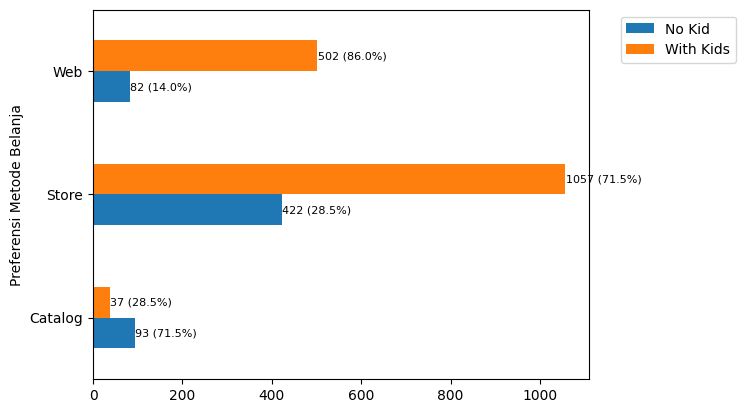

In [952]:
# Create the horizontal bar chart
ax = df.groupby('Preferensi Metode Belanja')['Struktur Keluarga'].value_counts().unstack().plot(kind='barh', stacked=False)

# Annotate bars with count and percentage
for p in ax.patches:
    width = p.get_width()  # Get the bar width (count)

    # Get the category label for this bar
    category = df['Preferensi Metode Belanja'].unique()[int(p.get_y() + 0.5)]  # +0.5 for rounding

    # Calculate percentage based on total for that category
    total = df['Preferensi Metode Belanja'].value_counts()[category]  # Total for the preference
    percentage = (width / total) * 100 if total else 0  # Avoid division by zero

    # Add annotation: Count (Percentage)
    ax.annotate(f'{int(width)} ({percentage:.1f}%)',  # Format annotation text
                (width + 1, p.get_y() + p.get_height() / 2),  # Position annotation
                ha='left', va='center', fontsize=8)  # Style annotation

# Adjust legend position
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

pembelian web memiliki presentase keluarga dengan anak tertinggi dengan 86% artinya kebanyakan cust yang prefer belanja web punya anak dirumah ini masuk akal karena mungkin diakibatkan kesibukan mengurus anak sehingga kesulitan untuk pergi ke store.

### Hubungan dengan Produk yang Dibeli

Periksa setiap preferensi metode belanja dengan jenis produk yang paling banyak dibeli:

- MntWines
- MntFruits
- MntMeatProducts
- MntFishProducts
- MntSweetProducts
- MntGoldProds


In [953]:
# membuat bar chart horizontal yang menampilkan data sum MntWines,MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, dan total MntAllProducts dimana merupakan sum dari MntWines,MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds dari setiap unique values "Preferensi Metode Belanja"
amount_spend = df.groupby('Preferensi Metode Belanja').agg({
    'MntWines':'sum',
    'MntFruits':'sum',
    'MntMeatProducts':'sum',
    'MntFishProducts':'sum',
    'MntSweetProducts':'sum',
    'MntGoldProds':'sum'
})

amount_spend['Total MntAllProducts'] = amount_spend.sum(axis=1)
amount_spend

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total MntAllProducts
Preferensi Metode Belanja,,,,,,,
Catalog,77372,7644,59262,11271,7085,10995,173629
Store,404589,37581,233422,52631,38770,56853,823846
Web,177758,11836,70547,17034,12954,28699,318828


Melihat presentase preferensi metode belanja berdasarkan amount spend dari tiap jenis product

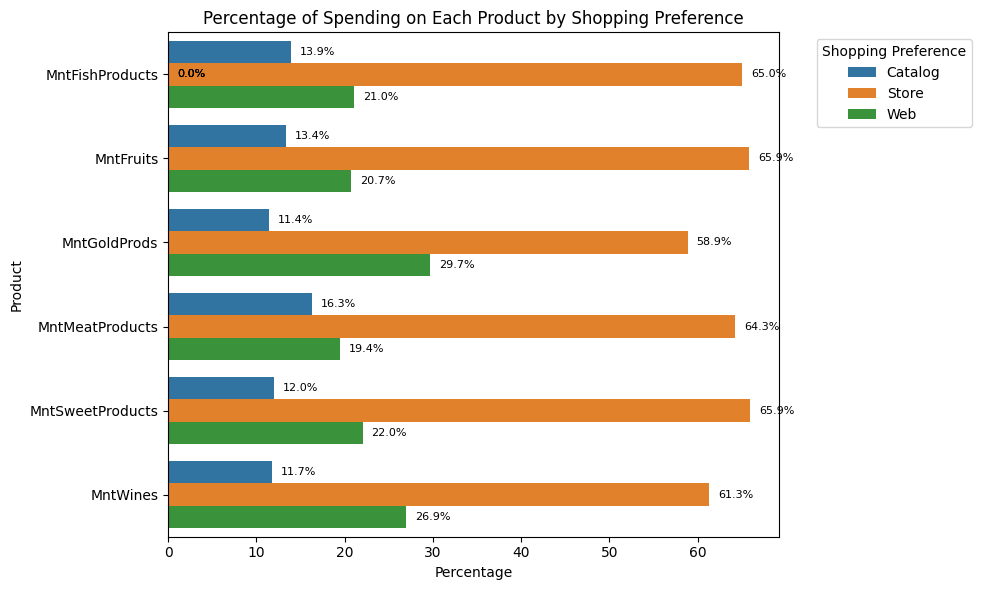

In [954]:
# Calculate the total amount spent for each product category across all preferences
total_spend_per_product = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

# Group data by shopping preference and product, then calculate percentages
amount_spend = df.groupby('Preferensi Metode Belanja')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
percentage_spend = amount_spend.div(total_spend_per_product, axis=1) * 100  # Percentage per product

# Reshape the DataFrame for plotting
plot_df = percentage_spend.stack().reset_index()
plot_df.columns = ['Preferensi Metode Belanja', 'Product', 'Percentage']

# Sort the DataFrame for bar ordering (optional)
plot_df = plot_df.sort_values(by=['Product', 'Preferensi Metode Belanja'])

# Create the horizontal bar chart using seaborn
import seaborn as sns
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Percentage', y='Product', hue='Preferensi Metode Belanja', data=plot_df, orient='h')

# Annotate bars with percentage values
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.1f}%', (width + 1, p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=8)

# Customize the plot
plt.title('Percentage of Spending on Each Product by Shopping Preference')
plt.xlabel('Percentage')
plt.ylabel('Product')
plt.legend(title='Shopping Preference', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Preferensi metode belanja 'Store' menunjukkan presentase tertinggi di setiap product, wajar karena presentase customer yang belanja di store juga paling tinggi.

  Melihat amount spend tiap produk berdasarkan preferensi metode belanja

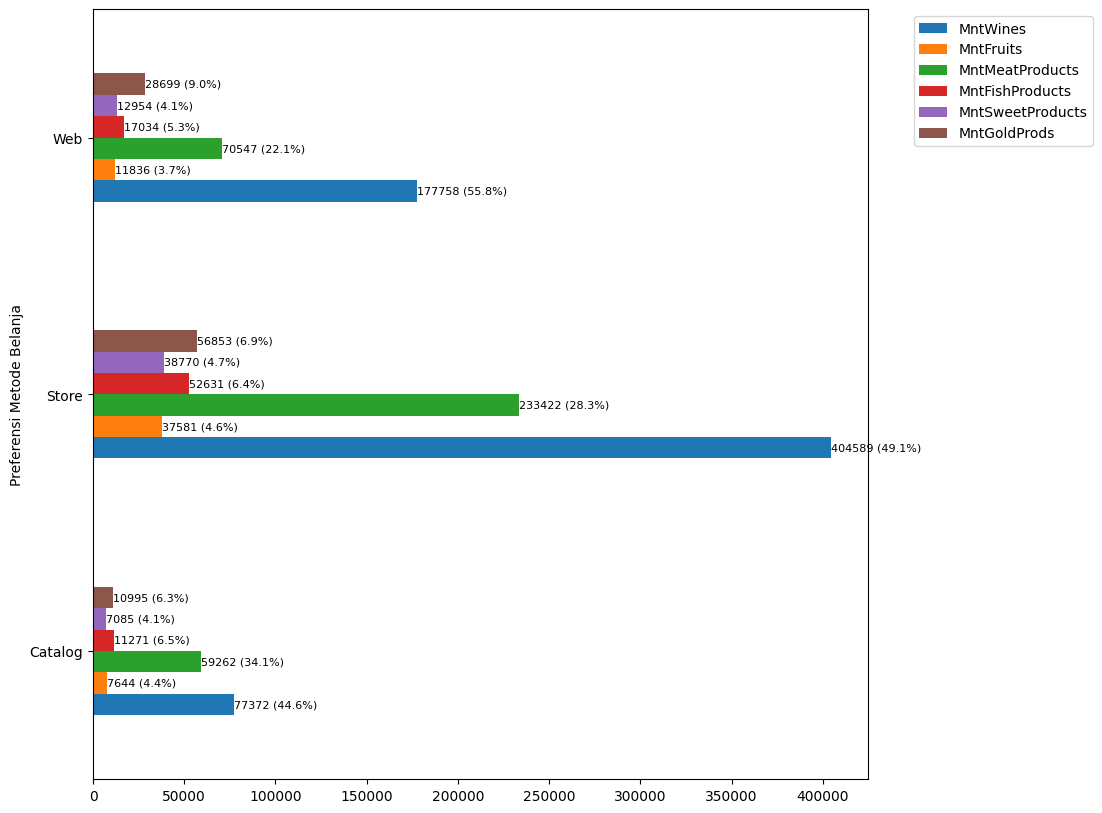

In [955]:
# Melihat banyak nya amount spend tiap produk berdasarkan preferensi metode belanja
# Membuat horizontal bar chart dari tabel amount spend
ax = amount_spend.plot(kind='barh', stacked=False, width = 0.5, figsize=(10, 10))

# Annotate bars with count and percentage
for p in ax.patches:
    width = p.get_width()  # Get the bar width (count)

    # Get the category label for this bar
    category = df['Preferensi Metode Belanja'].unique()[int(p.get_y() + 0.5)]  # +0.5 for rounding

    # Calculate percentage based on total amount spent for that preference
    total_amount_spent = amount_spend.loc[category].sum()  # Total amount for the preference
    percentage = (width / total_amount_spent) * 100 if total_amount_spent else 0  # Avoid division by zero

    # Add annotation: Count (Percentage)
    ax.annotate(f'{int(width)} ({percentage:.1f}%)',  # Format annotation text
                (width + 1, p.get_y() + p.get_height() / 2),  # Position annotation
                ha='left', va='center', fontsize=8)  # Style annotation

# Adjust legend position
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Product yang paling banyak dibeli di semua preferensi metode belanja adalah wine.

### Hubungan dengan Aktivitas Promosi

Menghitung perkiraan presentase customer yang akan menerima penawaran promosi untuk beralih dari pembelian store ke pembelian web:

- NumDealsPurchases: Berapa persen customer yang memanfaatkan promo diskon?
- AcceptedCmp1-5:Berapa persen penerimaan customer terhadap campaign promosi?
- Response: Apakah pelanggan yang menerima promosi terakhir memiliki preferensi metode tertentu?

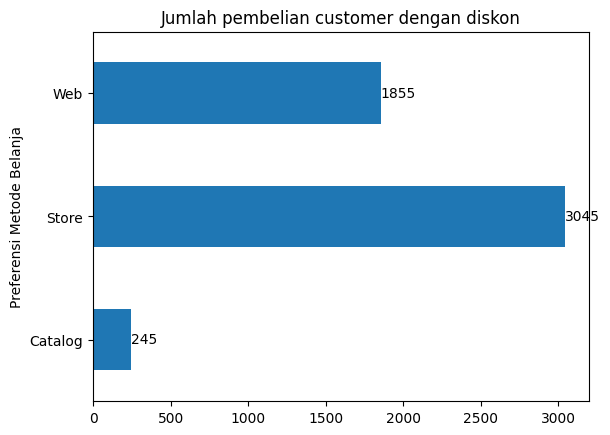

In [956]:
# melihat sum untuk kolom 'NumDealsPurchases' dari setiap preferensi metode belanja
df.groupby('Preferensi Metode Belanja')['NumDealsPurchases'].sum()

# menampilkan dalam bentuk horizontal bar plot
df.groupby('Preferensi Metode Belanja')['NumDealsPurchases'].sum().plot(kind='barh')

# menampilkan annonate
for i, value in enumerate(df.groupby('Preferensi Metode Belanja')['NumDealsPurchases'].sum()):
    plt.annotate(f'{value}', xy=(value, i), ha='left', va='center')

# menambahkan judul bar plot 'Jumlah pembelian customer dengan diskon'
plt.title('Jumlah pembelian customer dengan diskon')
plt.show()

Customer dengan preferensi metode belanja 'Store' dari total transaksi memanfaatkan promo diskon terbanyak dibanding metode belanja lainnya.

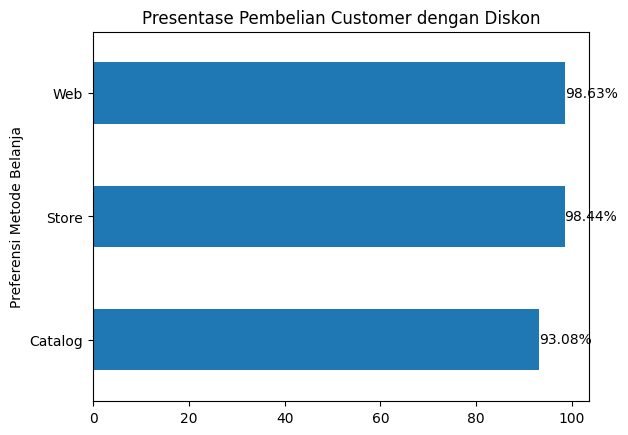

In [957]:
# Menghitung jumlah customer yang melakukan setidaknya satu pembelian dengan diskon
customers_with_deals = df[df['NumDealsPurchases'] >= 1].groupby('Preferensi Metode Belanja')['ID'].count()

# Menghitung total customer dalam setiap preferensi metode belanja
total_customers_per_preference = df.groupby('Preferensi Metode Belanja')['ID'].count()

# Menghitung persentase
percentage_with_deals = (customers_with_deals / total_customers_per_preference) * 100

# Menampilkan dalam bentuk horizontal bar plot dan annonate nya
percentage_with_deals.plot(kind='barh')
for i, value in enumerate(percentage_with_deals):
    plt.annotate(f'{value:.2f}%', xy=(value, i), ha='left', va='center')

# beri judul bar plot 'Presentase Pembelian Customer dengan Diskon'
plt.title('Presentase Pembelian Customer dengan Diskon')
plt.show()

Presentase customer yang menggunakan diskon dari semua preferensi metode belanja diatas 90% artinya hampir seluruh customer memanfaatkan promo diskon.

In [958]:
# melihat jumlah count kolom AcceptedCmp1,AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5 yang value == 1 berdasarkan preferensi metode belanja dalam bentuk dataframe
hitung = df.groupby('Preferensi Metode Belanja')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum()

# tambahkan kolom "TotalAccCmp" yang merupakan sum dari count kolom AcceptedCmp1,AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5 yang value == 1
hitung['TotalAccCmp'] = hitung[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

# tambahkan kolom "Presentase AccCmp" terhadap "TotalAccCmp"
hitung['Presentase AccCmp'] = hitung['TotalAccCmp'] / hitung['TotalAccCmp'].sum() * 100

# tampilkan hitung
hitung

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,TotalAccCmp,Presentase AccCmp
Preferensi Metode Belanja,,,,,,,
Catalog,31,4,19,13,27,94,14.551084
Store,78,23,76,102,105,384,59.442724
Web,28,3,65,49,23,168,26.006192


Presentase penerimaan campaign promosi secara keseluruhan customer tertinggi terdapat pada customer dengan preferensi belanja 'Store' dengan 59.4% dan disusul dengan 'Web' 26%.

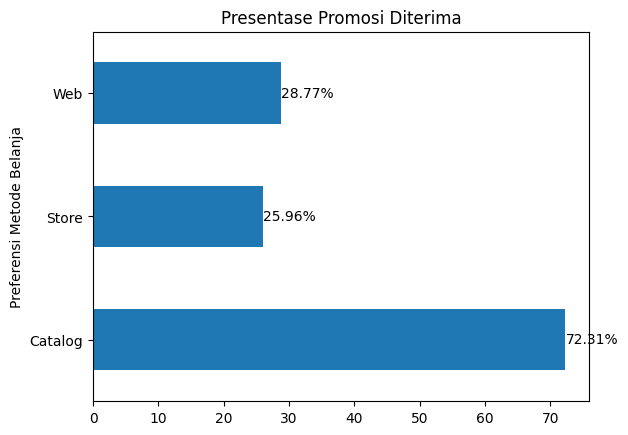

In [959]:
# Calculate the total number of rows for each shopping preference
preference_counts = df['Preferensi Metode Belanja'].value_counts()

# Calculate the total accepted campaigns for each shopping preference
# total_acccmp_per_preference = df.groupby('Preferensi Metode Belanja')['TotalAccCmp'].sum()

# Calculate the percentage of TotalAccCmp for each preference
percentage_acccmp = (hitung['TotalAccCmp'] / preference_counts) * 100

# membuat horizontal bar plot dari percentage_acccmp
percentage_acccmp.plot(kind='barh')

# tambahkan annonate
for i, value in enumerate(percentage_acccmp):
    plt.annotate(f'{value:.2f}%', xy=(value, i), ha='left', va='center')

# beri title 'Presentase Promosi Diterima'
plt.title('Presentase Promosi Diterima')
plt.show()

Presentase penerimaan campaign promosi per jumlah customer pada setiap preferensi metode belanja tertinggi terdapat pada customer dengan preferensi metode belanja 'Catalog' dengan 72.31% artinya setiap 100 customer yang belanja di catalog, sebanyak 72 orang menerima campaign promosi yang ditawarkan.

In [960]:
# menampilkan presentase values response dari setiap preferensi metode belanja
df.groupby('Preferensi Metode Belanja')['Response'].value_counts(normalize=True) * 100

Preferensi Metode Belanja  Response
Catalog                    0           66.923077
                           1           33.076923
Store                      0           89.317106
                           1           10.682894
Web                        0           78.767123
                           1           21.232877
Name: proportion, dtype: float64

Customer dengan preferensi metode belanja 'Catalog' menerima promosi terakhir dengan presentase tertinggi yaitu sebanyak 33.07%.

### Hubungan dengan Loyalitas

Periksa apakah loyalitas pelanggan memengaruhi metode belanja:

- Recency: Hubungan antara waktu sejak pembelian terakhir dan metode belanja.
- Complain: Preferensi metode belanja mana yang mendapat complain.

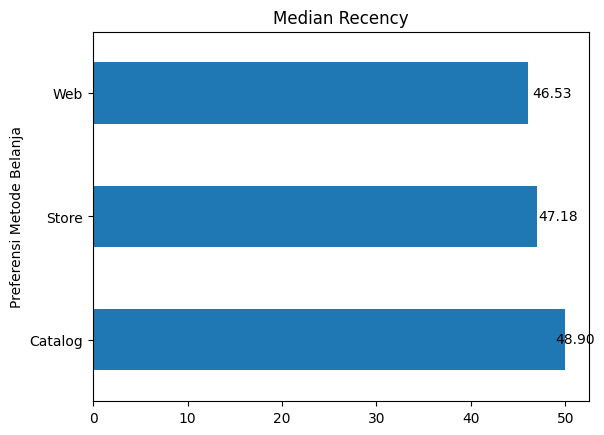

In [961]:
# buat horizontal bar plot yang menampilkan nilai median recency dari setiap Preferensi Metode Belanja
df.groupby('Preferensi Metode Belanja')['Recency'].median().plot(kind='barh')

# menambahkan annotate mean
for i, value in enumerate(df.groupby('Preferensi Metode Belanja')['Recency'].mean()):
    plt.annotate(f'{value:.2f}', xy=(value, i), ha='left', va='center')

# menambahkan judul bar plot 'Median Recency'
plt.title('Median Recency')
plt.show()

Recency dari semua preferensi metode belanja memiliki nilai yang berdekatan.

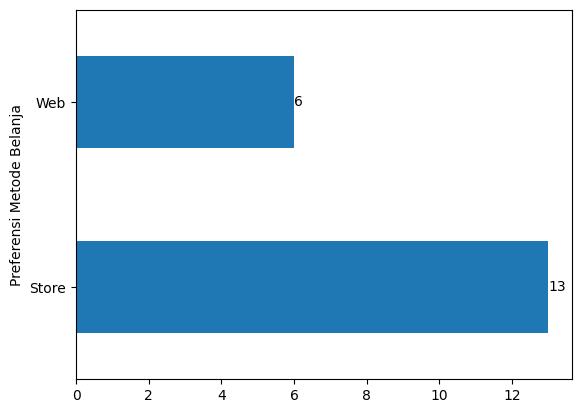

In [962]:
# membuat bar plot yang menampilkan count dari kolom 'Complain' yang memiliki values == 1 dari setiap Preferensi Metode Belanja
df[df['Complain'] == 1].groupby('Preferensi Metode Belanja')['Complain'].count().plot(kind='barh')

# menampilkan count dan presentase count dibanding keseluruhan tiap preferensi metode belanja
for i, value in enumerate(df[df['Complain'] == 1].groupby('Preferensi Metode Belanja')['Complain'].count()):
    plt.annotate(f'{value}', xy=(value, i), ha='left', va='center')

  Hanya terdapat 19 complain dari customer, 13 dari customer 'Store' dan 6 complain dari customer 'Web'

In [963]:
# melihat unique values dan count nya pada kolom 'complain' untuk setiap preferensi metode belanja dan presentasenya
df.groupby('Preferensi Metode Belanja')['Complain'].value_counts() / df.groupby('Preferensi Metode Belanja')['Complain'].count() * 100

Preferensi Metode Belanja  Complain
Catalog                    0           100.000000
Store                      0            99.121028
                           1             0.878972
Web                        0            98.972603
                           1             1.027397
dtype: float64

Presentase complain dari customer 'Store' dan 'Web' dibawah 2%, sangat sedikit customer yang complain artinya layanan supermarket sudah membuat customer puas.

### Mencari Jumlah Customer yang Memiliki Kesamaan Karakter Antar Customer Store dan Web

In [972]:
# memfilter kolom 'Preferensi Metode Belanja' == 'Store', 'Generasi' == 'Gen X', 'Education' == 'Graduation', 'Status' == 'In Relationship', 'Struktur Keluarga' == 'With Kids', 'MntWines' == median Mnt Wines dari customer dengan preferensi metode belanja Store
df_store = df[(df['Preferensi Metode Belanja'] == 'Store') &
  (df['Generasi'] == 'Gen X') &
  (df['Education'] == 'Graduation') &
  (df['Status'] == 'In Relationship')
]
df_store

,ID,Year_Birth,Lama Menjadi Member,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Preferensi Metode Belanja,Generasi,Status,Penghasilan,Struktur Keluarga
2,4141,1965.0,312,Graduation,Together,71613.0,0,0,2013-08-21,26,...,0,0,0,0,0,Store,Gen X,In Relationship,Above median,No Kid
32,5710,1970.0,627,Graduation,Together,40548.0,0,1,2012-10-10,31,...,0,0,0,0,0,Store,Gen X,In Relationship,Below median,With Kids
54,9381,1978.0,382,Graduation,Married,66373.0,1,1,2013-06-12,57,...,0,0,0,0,0,Store,Gen X,In Relationship,Above median,With Kids
61,3076,1975.0,660,Graduation,Together,66653.0,1,1,2012-09-07,18,...,0,0,0,0,0,Store,Gen X,In Relationship,Above median,With Kids
65,8082,1971.0,404,Graduation,Married,25721.0,1,0,2013-05-21,75,...,0,0,0,0,1,Store,Gen X,In Relationship,Below median,With Kids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2172,4084,1975.0,163,Graduation,Together,60934.0,0,1,2014-01-17,41,...,0,0,0,0,0,Store,Gen X,In Relationship,Above median,With Kids
2203,2736,1978.0,543,Graduation,Married,73807.0,0,1,2013-01-02,88,...,0,0,0,0,0,Store,Gen X,In Relationship,Above median,With Kids
2218,4838,1978.0,375,Graduation,Together,22775.0,1,0,2013-06-19,40,...,0,0,0,0,0,Store,Gen X,In Relationship,Below median,With Kids
2220,6261,1979.0,215,Graduation,Married,58025.0,0,1,2013-11-26,81,...,0,0,0,0,0,Store,Gen X,In Relationship,Above median,With Kids


In [977]:
# mengkalikan jumlah customer df_store dengan presentase penerimaan campaign customer 'Store'
total_peralihan = 237 * 0.2596
total_peralihan

61.5252

Jadi ada 237 customer dari 'Store' yang memiliki karakter mirip dengan customer 'Web'. 237 customer ini akan ditawarkan campaign untuk beralih ke belanja via web, penerimaan sebesar 25.96% artinya ada 61 orang yang akan menerima campaign peralihan dari belanja via 'Store' ke via 'Web'.

In [965]:
df

,ID,Year_Birth,Lama Menjadi Member,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Preferensi Metode Belanja,Generasi,Status,Penghasilan,Struktur Keluarga
0,5524,1957.0,663,Graduation,Single,58138.0,0,0,2012-09-04,58,...,0,0,0,0,1,Catalog,Baby Boomer,Not In Relationship,Above median,No Kid
1,2174,1954.0,113,Graduation,Single,46344.0,1,1,2014-03-08,38,...,0,0,0,0,0,Store,Baby Boomer,Not In Relationship,Below median,With Kids
2,4141,1965.0,312,Graduation,Together,71613.0,0,0,2013-08-21,26,...,0,0,0,0,0,Store,Gen X,In Relationship,Above median,No Kid
3,6182,1984.0,139,Graduation,Together,26646.0,1,0,2014-02-10,26,...,0,0,0,0,0,Store,Millenial,In Relationship,Below median,With Kids
4,5324,1981.0,161,PhD,Married,58293.0,1,0,2014-01-19,94,...,0,0,0,0,0,Store,Millenial,In Relationship,Above median,With Kids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974.0,363,Graduation,Married,34421.0,1,0,2013-07-01,81,...,0,0,0,0,0,Store,Gen X,In Relationship,Below median,With Kids
2235,10870,1967.0,381,Graduation,Married,61223.0,0,1,2013-06-13,46,...,0,0,0,0,0,Web,Gen X,In Relationship,Above median,With Kids
2237,7270,1981.0,155,Graduation,Divorced,56981.0,0,0,2014-01-25,91,...,0,0,0,0,0,Store,Millenial,Not In Relationship,Above median,No Kid
2238,8235,1956.0,156,Master,Together,69245.0,0,1,2014-01-24,8,...,0,0,0,0,0,Store,Baby Boomer,In Relationship,Above median,With Kids


In [970]:
# import df ke csv
df.to_csv('Supermarket Customer Cleaned.csv', index=False)

# Kesimpulan dan Rekomendasi

## Kesimpulan

- Preferensi metode belanja customer didominasi dengan metode 'Store' dengan presentase 66.4% dan disusul 'Web' 24.6%. Ini menunjukkan customer kita masih banyak yang menyukai belanja langsung di store tetapi sudah mulai banyak juga yang belanja via web.
- Gen X mendominasi pada preferensi belanja Web (52.4.8%) dan Store (48.7%) hingga hampir separuhnya , disusul dengan Millenial kemudian Baby Boomer. Proporsi generasi pada preferensi pembelian Web dan Store terdapat kemiripan.
- Tingkat pendidikan Graduation mendominasi pada semua preferensi metode belanja. Terdapat kemiripan proporsi tingkat pendidikan pada preferensi Web dan Store.
- In Relationship mendominasi pada semua preferensi metode belanja. Proporsi status pada preferensi metode belanja Web dan Store terdapat kemiripan.
- Presentase income pada preferensi metode belanja Web dan Store didominasi dengan Below Median, Web (56.3%) dan Store (50.9%).
- Pembelian web memiliki presentase keluarga dengan anak tertinggi dengan 86% artinya kebanyakan customer yang prefer belanja web punya anak dirumah ini masuk akal karena mungkin diakibatkan kesibukan mengurus anak sehingga kesulitan untuk pergi ke store.
- Preferensi metode belanja 'Store' menunjukkan presentase tertinggi di setiap product, wajar karena presentase customer yang belanja di store juga paling tinggi.
- Product yang paling banyak dibeli di semua preferensi metode belanja adalah wine.
- Customer dengan preferensi metode belanja 'Store' dari total transaksi memanfaatkan promo diskon terbanyak dibanding metode belanja lainnya.
- Presentase customer yang menggunakan diskon dari semua preferensi metode belanja diatas 90%  dengan ‘Web’ (98.63%), ‘Store’ (98.44%), ‘Catalog’ (93.08%) artinya hampir seluruh customer memanfaatkan promo diskon.
- Presentase penerimaan campaign promosi secara keseluruhan customer tertinggi terdapat pada customer dengan preferensi belanja 'Store' dengan 59.4% dan disusul dengan 'Web' 26%.
- Presentase penerimaan campaign promosi per jumlah customer pada setiap preferensi metode belanja tertinggi terdapat pada customer dengan preferensi metode belanja 'Catalog' dengan 72.31% artinya setiap 100 customer yang belanja di catalog, sebanyak 72 orang menerima campaign promosi yang ditawarkan.
- Customer dengan preferensi metode belanja 'Catalog' menerima promosi terakhir dengan presentase tertinggi yaitu sebanyak 33.07%.
- Recency dari semua preferensi metode belanja memiliki nilai yang berdekatan yaitu ‘Web’ (46.53), ‘Store’ (47.18), ‘Catalog’ (48.90)
- Ditemukan 237 customer dari 'Store' yang memiliki kesamaan karakter dengan customer 'Web'


## Rekomendasi

Customer 'Store' yang memiliki kesamaan karakter dengan customer 'Web' maka akan di tawarkan campaign untuk beralih ke pembelian via web. Jumlah customer yang akan menerima campaign peralihan dari store ke web adalah 61 orang. Hal ini dilakukan untuk meningkatkan customer yang berbelanja via web mengingat potensi kedepan e-commerce akan semakin berkembang dan berbagai keuntungan operasional dari mengembangkan e-commerce daripada offline store.